Benoit Parmentier

#Data Challenge Capacity

Your Mission

Design and implement a multi-sensor approach to deforestation detection that combines SAR
(radar) **and** optical data. We're providing a basic Sentinel-2-only dataset loader as a starting
point, but it has significant limitations you'll need to address.

**Core Requirements**

- Must use both SAR and optical sensors (this is non-negotiable)
- Address the temporal nature of change detection (before/after comparison)
- Handle real-world data messiness (clouds, missing data, different providers)
- Show measurable improvement over single-sensor approaches

**Minimum Viable Solution:***

- Loads both SAR and optical data successfully
- Demonstrates some form of sensor fusion (even if simple)
- Shows basic change detection capability
- Provides quantitative comparison vs single-sensor baseline

**Deliverables**
- Code: Working multi-modal implementation with both SAR and optical data processing
- Analysis: Document your methodology, key findings, and trade-offs. How did SAR +
optical compare to each sensor alone?
- Results: Quantitative comparisons showing multi-sensor vs single-sensor performance
- Demo: Clear example showing your system processing an alert and producing
deforestation predictions
- Submission: GitHub repository with code, documentation, and result visualizations


# 1. Import Libraries and Setup

Purpose: Import all necessary libraries for data loading, processing, and visualization

Note: You'll need additional libraries for SAR processing and multi-sensor fusion

In [1]:
#install gdal to run from the terminal
!sudo add-apt-repository ppa:ubuntugis/ppa -y
!sudo apt-get update
!sudo apt-get install gdal-bin
!gdalinfo --version

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ppa.gpg with fingerprint 2EC86B48E6A9F326623CD22FFF0E7BBEC491C6A1
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://

In [2]:

# Install required packages
!pip install albumentations
!pip install torch torchinfo torchmetrics kornia opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#set up libararies for GIS/Geospatial
!pip install fiona
!pip install folium

try: # try the following b+lock of code
  import geopandas as gpd
except: # if the try block throws an error, run the following
  !pip install geopandas # install geopandas
  import geopandas as gpd

try:
  import contextily as ctx # import
  import rasterio
except:
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  !pip install rasterio
import fiona # library for reading/writing GIS files, comes w/ geopandas
from shapely.geometry import Point, LineString, Polygon

!pip install pyproj
# Mapping,vector related imports
import geopandas as gpd
#import descartes #nessary for plotting in geopandas
from cartopy import crs as ccrs
from pyproj import Proj
#from osgeo import osr
from shapely import geometry
from shapely.geometry import Point
from shapely.geometry import box
from shapely.geometry import shape
from shapely.geometry import Polygon

from collections import OrderedDict
#rasterio imports, gdal and imagery utility
import rasterio
from rasterio.windows import Window
from osgeo import gdal
from rasterio import plot
from PIL import Image

#xarray and rio
!pip install rioxarray
!pip install mapclassify
!pip install earthpy
import shapely

import mapclassify
import folium
import pyproj as proj
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from folium.utilities import none_max
import folium
from pyproj import Transformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 90.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (147 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 127479 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb 

In [4]:
###### Library used in this script
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns

import numpy as np
import subprocess
import pandas as pd
import os, glob
import zipfile

# Mapping,vector related imports
import geopandas as gpd
#import descartes #nessary for plotting in geopandas
from cartopy import crs as ccrs
from pyproj import Proj
#from osgeo import osr
from shapely.geometry import Point
from shapely.geometry import box
from collections import OrderedDict

#ML imports
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#rasterio imports, gdal and imagery utility
import rasterio
from rasterio.windows import Window
#import gdal
from osgeo import gdal
from rasterio import plot
from PIL import Image
'''
#Keras import
from tensorflow import keras
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Input, Conv2D, Concatenate, Activation, MaxPool2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
'''

sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', None)

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn

In [6]:
# Core ML and data processing
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Geospatial data handling
import rasterio
from rasterio.windows import Window
import numpy as np

# File system and data structures
from pathlib import Path
import json
from dataclasses import dataclass
from typing import List, Tuple, Optional, Dict

# Visualization and utilities
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore', category=rasterio.errors.NotGeoreferencedWarning)

print("✓ Libraries imported successfully")
print(f"PyTorch version: {torch.__version__}")

✓ Libraries imported successfully
PyTorch version: 2.6.0+cu124


Mount google drive for in in google colab.

In [7]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Define Data Structures

Purpose: Create dataclasses to represent satellite products and alert data
- some nice helper fucntions already to help keep the assignment within the time like product-specific normalization and band mapping

Extension needed: Add similar structures for Sentinel-1, Landsat, CBERS data

In [8]:
@dataclass
class Sentinel2Product:
    """
    Represents a single Sentinel-2 product with its file paths and metadata

    Attributes:
        tif_path: Path to the GeoTIFF file containing multi-band imagery
        bands_json_path: Path to JSON file describing band information
        metadata_path: Path to JSON file with acquisition metadata
        product_type: Data provider ('AWS', 'BDC_S2_L2A', 'BDC_S2-16D')
        date: Acquisition datetime
    """
    tif_path: Path
    bands_json_path: Path
    metadata_path: Path
    product_type: str  # 'AWS', 'BDC_S2_L2A', 'BDC_S2-16D'
    date: datetime

    def get_band_mapping(self) -> Dict[str, Optional[int]]:
        """
        Get band indices for RGBN based on product type

        Returns:
            Dictionary mapping color names to band indices

        Note: Both AWS and INPE BDC use Sentinel-2 band naming conventions:
        - B02 = Blue (490 nm)
        - B03 = Green (560 nm)
        - B04 = Red (665 nm)
        - B08 = NIR (842 nm)
        """
        with open(self.bands_json_path, 'r') as f:
            bands_info = json.load(f)

        bands = bands_info['bands']

        # Both AWS and BDC use Sentinel-2 band nomenclature
        mapping = {
            'red': bands.index('B04') if 'B04' in bands else None,
            'green': bands.index('B03') if 'B03' in bands else None,
            'blue': bands.index('B02') if 'B02' in bands else None,
            'nir': bands.index('B08') if 'B08' in bands else None
        }

        # Validate mapping
        missing_bands = [color for color, idx in mapping.items() if idx is None]
        if missing_bands:
            print(f"⚠️  Missing bands {missing_bands} in {self.product_type} product")
            print(f"Available bands: {bands}")

        return mapping

@dataclass
class AlertData:
    """
    Represents all data for one deforestation alert

    Attributes:
        alert_id: Unique identifier from MapBiomas
        mask_path: Path to ground truth deforestation mask
        products: List of all satellite products for this alert
    """
    alert_id: str
    mask_path: Path
    products: List[Sentinel2Product]

print("✓ Data structures defined")

✓ Data structures defined


# Implement Dataset Class

Purpose: Create PyTorch Dataset for loading and preprocessing Sentinel-2 data

Critical extension needed: Modify to handle multiple sensor types and temporal sequences

In [9]:
class Sentinel2Dataset(Dataset):
    """
    Enhanced PyTorch Dataset for Sentinel-2 deforestation alert imagery

    Features:
    - Product-specific normalization (AWS vs INPE BDC)
    - Robust band mapping with fallbacks
    - Enhanced error handling
    - Statistical normalization per product type
    """

    def __init__(self, root_dir: str, crop_size: int = 448, normalize: bool = True,
                 augment: bool = False, product_specific_norm: bool = True):
        """
        Initialize the dataset

        Args:
            root_dir: Path to alert_imagery directory
            crop_size: Size of square crop in pixels (default 448x448)
            normalize: Whether to normalize bands to 0-1 range
            augment: Whether to apply random augmentations during training
            product_specific_norm: If True, compute separate normalization stats per product type
        """
        self.root_dir = Path(root_dir)
        self.crop_size = crop_size
        self.normalize = normalize
        self.augment = augment
        self.product_specific_norm = product_specific_norm

        # Load alerts first
        self.alerts = self._load_alerts()

        # Compute normalization statistics if needed
        if self.normalize and self.product_specific_norm:
            print("Computing product-specific normalization statistics...")
            self.norm_stats = self._compute_product_normalization_stats()
        else:
            self.norm_stats = None

        # Create flat list of all products for easy PyTorch indexing
        self.samples = []
        for alert in self.alerts:
            for product in alert.products:
                self.samples.append((alert, product))

    def _compute_product_normalization_stats(self, sample_size: int = 50):
        """
        Compute normalization statistics for each product type

        Args:
            sample_size: Number of samples per product type to analyze
        """
        from collections import defaultdict
        import random

        # Group products by type
        products_by_type = defaultdict(list)
        for alert in self.alerts:
            for product in alert.products:
                products_by_type[product.product_type].append(product)

        norm_stats = {}

        for product_type, products in products_by_type.items():
            print(f"  Computing stats for {product_type} ({len(products)} products)...")

            # Sample products for efficiency
            sample_products = random.sample(products, min(sample_size, len(products)))

            band_values = {i: [] for i in range(4)}  # RGBN bands

            for product in sample_products:
                try:
                    with rasterio.open(product.tif_path) as src:
                        # Get band mapping
                        band_map = product.get_band_mapping()

                        # Sample a small window for efficiency
                        window_size = 100
                        row = random.randint(0, max(0, src.height - window_size))
                        col = random.randint(0, max(0, src.width - window_size))
                        window = Window(col, row,
                                      min(window_size, src.width - col),
                                      min(window_size, src.height - row))

                        # Read RGBN bands
                        for color_idx, color in enumerate(['red', 'green', 'blue', 'nir']):
                            if band_map[color] is not None:
                                band_data = src.read(band_map[color] + 1, window=window)
                                # Remove no-data values
                                valid_data = band_data[band_data > 0]
                                if len(valid_data) > 100:  # Ensure sufficient data
                                    band_values[color_idx].extend(valid_data.flatten().tolist())

                except Exception as e:
                    print(f"    Warning: Error processing {product.tif_path}: {e}")
                    continue

            # Compute statistics for each band
            band_stats = {}
            band_names = ['Red', 'Green', 'Blue', 'NIR']

            for band_idx in range(4):
                if band_values[band_idx]:
                    values = np.array(band_values[band_idx])

                    # Use percentiles for robust statistics (avoid outliers)
                    p1, p99 = np.percentile(values, [1, 99])
                    valid_values = values[(values >= p1) & (values <= p99)]

                    band_stats[band_idx] = {
                        'mean': np.mean(valid_values),
                        'std': np.std(valid_values),
                        'min': np.min(valid_values),
                        'max': np.max(valid_values),
                        'p1': p1,
                        'p99': p99
                    }

                    print(f"    {band_names[band_idx]}: range=[{p1:.0f}, {p99:.0f}], mean={np.mean(valid_values):.0f}")
                else:
                    # Fallback to generic stats
                    print(f"    {band_names[band_idx]}: No valid data found, using fallback")
                    band_stats[band_idx] = {
                        'mean': 3000, 'std': 2000, 'min': 0, 'max': 10000,
                        'p1': 0, 'p99': 8000
                    }

            norm_stats[product_type] = band_stats

        return norm_stats

    def _apply_product_specific_normalization(self, rgbn: np.ndarray, product_type: str) -> np.ndarray:
        """
        Apply product-specific normalization to RGBN data

        Args:
            rgbn: Raw RGBN data of shape (4, H, W)
            product_type: Product type string

        Returns:
            Normalized RGBN data in [0,1] range
        """
        if not self.norm_stats or product_type not in self.norm_stats:
            # Fallback to generic normalization
            if rgbn.max() > 255:
                return np.clip(rgbn.astype(np.float32) / 10000.0, 0, 1)
            else:
                return np.clip(rgbn.astype(np.float32) / 255.0, 0, 1)

        stats = self.norm_stats[product_type]
        normalized = rgbn.astype(np.float32).copy()

        for band_idx in range(4):
            band_stats = stats[band_idx]

            # Min-Max normalization using robust percentiles
            p1, p99 = band_stats['p1'], band_stats['p99']
            if p99 > p1:  # Avoid division by zero
                normalized[band_idx] = np.clip(
                    (normalized[band_idx] - p1) / (p99 - p1), 0, 1
                )
            else:
                # Fallback if percentiles are equal
                normalized[band_idx] = np.clip(normalized[band_idx] / 10000.0, 0, 1)

        return normalized

    def _load_alerts(self) -> List[AlertData]:
        """
        Scan directory structure and load all alerts with their Sentinel-2 products
        Enhanced with better error handling and product type detection
        """
        alerts = []

        for alert_dir in self.root_dir.iterdir():
            if not alert_dir.is_dir():
                continue

            # Find ground truth mask
            mask_files = list(alert_dir.glob("*_mask.tif"))
            if not mask_files:
                continue  # Skip silently to reduce noise
            mask_path = mask_files[0]

            # Find Sentinel-2 products
            s2_dir = alert_dir / "sentinel2"
            if not s2_dir.exists():
                continue  # Skip silently

            products = []
            for tif_file in s2_dir.glob("*.tif"):
                # IMPORTANT: Skip derived indices - only load raw multi-band imagery
                filename = tif_file.name.lower()
                if any(index in filename for index in ['_ndvi', '_gndvi', '_ndwi', '_ndre', '_cri']):
                    continue

                # Find corresponding metadata files
                base_name = tif_file.stem
                bands_json = tif_file.parent / f"{base_name}_bands.json"
                metadata_json = tif_file.parent / f"{base_name}_metadata.json"

                if bands_json.exists() and metadata_json.exists():
                    try:
                        # Verify this is multi-band imagery (not single-band index)
                        with open(bands_json, 'r') as f:
                            bands_info = json.load(f)

                        # Skip if less than 4 bands (likely a derived index)
                        if len(bands_info.get('bands', [])) < 4:
                            continue

                        # Load metadata and determine product type
                        with open(metadata_json, 'r') as f:
                            metadata = json.load(f)

                        # Enhanced product type classification
                        if 'S2-16D' in base_name:
                            product_type = 'BDC_S2-16D'  # INPE 16-day mosaic
                        elif any(pattern in base_name for pattern in ['S2A_MSIL2A', 'S2B_MSIL2A', 'S2_L2A']):
                            product_type = 'BDC_S2_L2A'  # INPE Level-2A
                        else:
                            product_type = 'AWS'  # AWS/Element84 product

                        product = Sentinel2Product(
                            tif_path=tif_file,
                            bands_json_path=bands_json,
                            metadata_path=metadata_json,
                            product_type=product_type,
                            date=datetime.fromisoformat(metadata['datetime']) if metadata.get('datetime') else datetime.now()
                        )
                        products.append(product)

                    except (json.JSONDecodeError, KeyError, ValueError) as e:
                        # Skip problematic files silently
                        continue

            if products:
                # Sort products by date for temporal analysis
                alerts.append(AlertData(
                    alert_id=alert_dir.name,
                    mask_path=mask_path,
                    products=sorted(products, key=lambda x: x.date)
                ))

        return alerts

    def _get_random_crop_params(self, height: int, width: int) -> Tuple[int, int]:
        """Get parameters for random crop during training"""
        if height >= self.crop_size and width >= self.crop_size:
            y = np.random.randint(0, height - self.crop_size + 1)
            x = np.random.randint(0, width - self.crop_size + 1)
        else:
            # Center crop if image is smaller than crop size
            y = max(0, (height - self.crop_size) // 2)
            x = max(0, (width - self.crop_size) // 2)
        return x, y

    def _center_crop_params(self, height: int, width: int) -> Tuple[int, int]:
        """Get parameters for center crop during inference"""
        y = max(0, (height - self.crop_size) // 2)
        x = max(0, (width - self.crop_size) // 2)
        return x, y

    def _apply_crop_and_pad(self, data: np.ndarray, x: int, y: int) -> np.ndarray:
        """Apply crop and pad to ensure consistent output size"""
        h, w = data.shape[-2:]

        # Crop to requested region
        y_end = min(y + self.crop_size, h)
        x_end = min(x + self.crop_size, w)

        if len(data.shape) == 3:  # Multi-band image
            cropped = data[:, y:y_end, x:x_end]
        else:  # Single band (mask)
            cropped = data[y:y_end, x:x_end]

        # Pad if necessary to reach crop_size
        if cropped.shape[-2] < self.crop_size or cropped.shape[-1] < self.crop_size:
            if len(data.shape) == 3:
                pad_h = self.crop_size - cropped.shape[1]
                pad_w = self.crop_size - cropped.shape[2]
                padded = np.pad(cropped, ((0, 0), (0, pad_h), (0, pad_w)), mode='constant')
            else:
                pad_h = self.crop_size - cropped.shape[0]
                pad_w = self.crop_size - cropped.shape[1]
                padded = np.pad(cropped, ((0, pad_h), (0, pad_w)), mode='constant')
            return padded

        return cropped

    def __len__(self) -> int:
        return len(self.samples)

    def __getitem__(self, idx: int) -> Dict:
        """
        Load and preprocess a single sample with product-specific normalization
        """
        alert, product = self.samples[idx]

        # Load RGBN bands from satellite imagery
        with rasterio.open(product.tif_path) as src:
            height, width = src.height, src.width

            # Determine crop location
            if self.augment and hasattr(self, 'training') and self.training:
                x, y = self._get_random_crop_params(height, width)
            else:
                x, y = self._center_crop_params(height, width)

            # Define reading window for efficiency
            window = Window(x, y,
                          min(self.crop_size, width - x),
                          min(self.crop_size, height - y))

            # Get band mapping for this product type
            band_map = product.get_band_mapping()

            # Read RGBN bands
            rgbn_bands = []
            for color in ['red', 'green', 'blue', 'nir']:
                if band_map[color] is not None:
                    # Note: rasterio uses 1-based band indexing
                    band_data = src.read(band_map[color] + 1, window=window)
                    rgbn_bands.append(band_data)
                else:
                    # Handle missing bands by creating zeros
                    h = min(self.crop_size, height - y)
                    w = min(self.crop_size, width - x)
                    rgbn_bands.append(np.zeros((h, w), dtype=src.dtypes[0]))

            rgbn = np.stack(rgbn_bands, axis=0)  # Shape: (4, H, W)

            # Apply product-specific normalization
            if self.normalize:
                if self.product_specific_norm:
                    rgbn = self._apply_product_specific_normalization(rgbn, product.product_type)
                else:
                    # Generic normalization (original method)
                    if src.dtypes[0] == 'uint16' or rgbn.max() > 255:
                        rgbn = rgbn.astype(np.float32) / 10000.0
                    elif src.dtypes[0] == 'uint8':
                        rgbn = rgbn.astype(np.float32) / 255.0
                    else:
                        rgbn = rgbn.astype(np.float32)
                    rgbn = np.clip(rgbn, 0, 1)
            else:
                rgbn = rgbn.astype(np.float32)

        # Load corresponding ground truth mask
        with rasterio.open(alert.mask_path) as src:
            mask_height, mask_width = src.height, src.width

            # Calculate corresponding window for mask (may be different resolution)
            scale_x = mask_width / width
            scale_y = mask_height / height

            mask_x = int(x * scale_x)
            mask_y = int(y * scale_y)
            mask_window_w = int(self.crop_size * scale_x)
            mask_window_h = int(self.crop_size * scale_y)

            mask_window = Window(mask_x, mask_y,
                               min(mask_window_w, mask_width - mask_x),
                               min(mask_window_h, mask_height - mask_y))

            mask = src.read(1, window=mask_window)

        # Apply consistent cropping and padding
        rgbn = self._apply_crop_and_pad(rgbn, 0, 0)  # Already windowed

        # Resize mask to match imagery if needed
        if mask.shape != (self.crop_size, self.crop_size):
            import cv2
            mask = cv2.resize(mask, (self.crop_size, self.crop_size),
                            interpolation=cv2.INTER_NEAREST)

        # Convert to PyTorch tensors
        rgbn_tensor = torch.from_numpy(rgbn).float()
        mask_tensor = torch.from_numpy(mask).long()

        # Apply data augmentation if enabled
        if self.augment and hasattr(self, 'training') and self.training:
            # Random horizontal flip
            if np.random.rand() > 0.5:
                rgbn_tensor = torch.flip(rgbn_tensor, dims=[2])
                mask_tensor = torch.flip(mask_tensor, dims=[1])

            # Random vertical flip
            if np.random.rand() > 0.5:
                rgbn_tensor = torch.flip(rgbn_tensor, dims=[1])
                mask_tensor = torch.flip(mask_tensor, dims=[0])

        return {
            'rgbn': rgbn_tensor,
            'mask': mask_tensor,
            'alert_id': alert.alert_id,
            'product_type': product.product_type,
            'date': product.date.isoformat()
        }

    def train(self):
        """Set dataset to training mode (enables augmentation)"""
        self.training = True
        return self

    def eval(self):
        """Set dataset to evaluation mode (disables augmentation)"""
        self.training = False
        return self

print("✓ Dataset class implemented with product-specific normalization")

✓ Dataset class implemented with product-specific normalization


# Define functions

In [10]:
# Define functions
def create_dir_and_check_existence(path):

    #Create a new directory
    try:
        os.makedirs(path)
    except:
        print ("directory already exists")

#1.Set up parameters and arguments

In [11]:
############################################################################
#####  Parameters and argument set up ###########

#ARG 1
in_dir = '/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/'
#ARG 2
out_dir = "/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/"
#ARGS 3:
create_out_dir=True #create a new ouput dir if TRUE
#ARG 4
out_suffix = "test_20250812" #output suffix for the files and ouptut folder
#ARG 5
NA_value = -9999 # currently not used: Nan value
#ARG 6
random_seed=105 # set seed for reproducibility of results
download_data=False #download data if True
#copy_files = False #if false, will not create train test split and copy files into the adequate file structure
create_split= False
#ARG 7
## Input data
#data_dir ='/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/flood_mapping_deep_learning/data'
#ARG 8
#run_model = False #if True, model is trained, note this may take several hours.
#ARG 9
# Use pre-trained model if run_model is False
#model_path ='/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/flood_mapping_deep_learning/models/output_data_semantic_seg_flood_20250804/model_unet_semantic_seg_flood_20250804.pth'


In [12]:
################# START SCRIPT ###############################

######### PART 0: Set up the output dir ################

#set up the working directory
#Create output directory

if create_out_dir==True:
    out_dir_new = "output_data_"+out_suffix
    out_dir = os.path.join(out_dir,"outputs",out_dir_new)
    create_dir_and_check_existence(out_dir)
    os.chdir(out_dir)        #set working directory
else:
    os.chdir(out_dir) #use working dir defined earlier
print(os.getcwd())
print(out_dir)

directory already exists
/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/outputs/output_data_test_20250812
/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/outputs/output_data_test_20250812


#2.Download and explore data

A script is provided by Capacity and can be used to donwload all data if needed.

```
  ./download_dataset.sh all --extract                    # Download and extract everything
  ./download_dataset.sh sentinel2 --extract              # Get only Sentinel-2 data
  ./download_dataset.sh essential                        # Minimum dataset for ML research
  ./download_dataset.sh metadata                         # Just get documentation first

  ```

In [13]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/outputs/output_data_test_20250812


In [14]:
if download_data==True:
  %cd '/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data'
  !source download_dataset.sh all --extract                    # Download and extract everything
  os.setwd(out_dir)
!ls -ltr $'{in_dir}' | wc

    111     992    5730


In [15]:
#!ls -ltr 1390023/
!ls -ltr $'{in_dir}/1390023'

total 18
drwx------ 2 root root 4096 Jul 29 10:11 landsat
drwx------ 2 root root 4096 Jul 29 19:04 sentinel2
drwx------ 2 root root 4096 Jul 29 19:04 sentinel1
drwx------ 2 root root 4096 Jul 29 19:05 cbers4a
-rw------- 1 root root 1464 Aug 13 08:03 1390023_20250527_mask.tif


In [16]:
!ls -ltr $'{in_dir}/1390023/sentinel1'

total 6952
-rw------- 1 root root   4940 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504.tif.aux.xml
-rw------- 1 root root 372576 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504.tif
-rw------- 1 root root    394 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504_nrpb.tif.aux.xml
-rw------- 1 root root 276287 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504_nrpb.tif
-rw------- 1 root root   2600 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504_metadata.json
-rw------- 1 root root    822 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504_bands.json
-rw------- 1 root root    411 Aug 13 08:06 1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_

In [17]:
!ls -ltr $'{in_dir}/1390023/sentinel2'

total 49722
-rw------- 1 root root  208235 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407.tif.aux.xml
-rw------- 1 root root  248817 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407.tif
-rw------- 1 root root    2965 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407_bands.json
-rw------- 1 root root   10979 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250525_20250525.tif.aux.xml
-rw------- 1 root root  203438 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250525_20250525.tif
-rw------- 1 root root   19782 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407_ndwi.tif
-rw------- 1 root root   20099 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407_ndvi.tif
-rw------- 1 root root    1063 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407_metadata.json
-rw------- 1 root root   19764 Aug 13 08:25 1390023_sentinel2_S2-16D_V2_026009_20250407_20250407_gndvi.tif
-rw------- 1 root root   20300

In [18]:
!cat $'{in_dir}/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250529T133851_N0511_R124_T22MFA_20250529T184113_20250529_bands.json'

{
  "bands": [
    "AOT",
    "B01",
    "B02",
    "B03",
    "B04",
    "B05",
    "B06",
    "B07",
    "B08",
    "B09",
    "B11",
    "B12",
    "B8A",
    "SCL",
    "WVP"
  ],
  "band_count": 15,
  "band_statistics": [
    {
      "band": "AOT",
      "valid_pixels": 160801,
      "valid_percentage": 100.0,
      "min_value": 94.0,
      "max_value": 96.0,
      "mean_value": 94.945236658976
    },
    {
      "band": "B01",
      "valid_pixels": 160801,
      "valid_percentage": 100.0,
      "min_value": 1125.0,
      "max_value": 1624.0,
      "mean_value": 1218.5915448287012
    },
    {
      "band": "B02",
      "valid_pixels": 160801,
      "valid_percentage": 100.0,
      "min_value": 1070.0,
      "max_value": 2494.0,
      "mean_value": 1196.3189594592072
    },
    {
      "band": "B03",
      "valid_pixels": 160801,
      "valid_percentage": 100.0,
      "min_value": 1090.0,
      "max_value": 2877.0,
      "mean_value": 1368.0702047872837
    },
    {
      "band": 

Let's list the sentinel1, sentinel2 and mask images available.

In [19]:
list_mask_files = glob.glob(os.path.join(in_dir,'**','*_mask.tif'))
len(list_mask_files)
list_mask_files
len(list_mask_files)
print(list_mask_files[0])

list_alert_id = [os.path.basename(os.path.dirname(file_val)) for file_val in list_mask_files]
list_dates = [file_val.split('_')[-2] for file_val in list_mask_files]
#list_alert_id

df_mask_val = pd.DataFrame({'mask':list_mask_files,
                            'alert_id':list_alert_id,
                            'alert_date':list_dates})

df_mask_val


#List all Sentinel 1 imagery
list_sentinel1_json_files = glob.glob(os.path.join(in_dir,'**','sentinel1',f'*metadata.json'))
print(len(list_sentinel1_json_files))

list_sentinel1_files = [file_val.replace('_metadata.json','.tif') for file_val in list_sentinel1_json_files]
list_alert_id = [os.path.basename(os.path.dirname(os.path.dirname(file_val))) for file_val in list_sentinel1_files]
list_dates = [file_val.split('_')[-1].replace('.tif','') for file_val in list_sentinel1_files]

df_s1 = pd.DataFrame({'files_json':list_sentinel1_json_files,
                      's1_image':list_sentinel1_files,
                      #'product_type': pattern_name,
                      'alert_id':list_alert_id,
                      's1_date': list_dates}
                      )
df_s1

#getting Sentinel 2 data info

list_df_s2 = []
for pattern_name in ['S2-16D', 'S2A_MSIL2A', 'S2B_MSIL2A', 'S2_L2A','S2C_MSIL2A']:
  #print(pattern_name)
  #pattern_name = 'S2-16D'
  list_sentinel_json_files = glob.glob(os.path.join(in_dir,'**','sentinel2',f'*{pattern_name}*metadata.json'))
  #print(len(list_sentinel_json_files))

  list_sentinel_files = [file_val.replace('_metadata.json','.tif') for file_val in list_sentinel_json_files]
  list_alert_id = [os.path.basename(os.path.dirname(os.path.dirname(file_val))) for file_val in list_sentinel_files]
  list_dates = [file_val.split('_')[-1].replace('.tif','') for file_val in list_sentinel_files]

  df_s2_val = pd.DataFrame({'files_json':list_sentinel_json_files,
                        's2_image':list_sentinel_files,
                        'product_type': pattern_name,
                        'alert_id':list_alert_id,
                        's2_date': list_dates}
                       )
  list_df_s2.append(df_s2_val)


df_s2 = pd.concat(list_df_s2).reset_index(drop=True)
print('Number of Sentinel 1 files:', df_s1.shape[0])
print('Number of Sentinel 2 files:', df_s2.shape[0])
print('Number of deforestion mask files:', df_mask_val.shape[0])

print(df_s1['alert_id'].nunique())
print(df_s2['alert_id'].nunique())
print(df_mask_val['alert_id'].nunique())

df_s2

/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387923/1387923_20250301_mask.tif
162
Number of Sentinel 1 files: 162
Number of Sentinel 2 files: 1021
Number of deforestion mask files: 100
44
77
100


,files_json,s2_image,product_type,alert_id,s2_date
0,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20241202_20241202_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20241202_20241202.tif,S2-16D,1387925,20241202
1,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20250101_20250101_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20250101_20250101.tif,S2-16D,1387925,20250101
2,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20250202_20250202_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2-16D_V2_039013_20250202_20250202.tif,S2-16D,1387925,20250202
3,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2-16D_V2_039012_20241031_20241031_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2-16D_V2_039012_20241031_20241031.tif,S2-16D,1387926,20241031
4,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2-16D_V2_039012_20241116_20241116_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2-16D_V2_039012_20241116_20241116.tif,S2-16D,1387926,20241116
...,...,...,...,...,...
1016,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250429T133901_N0511_R124_T22MFA_20250429T182812_20250429_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250429T133901_N0511_R124_T22MFA_20250429T182812_20250429.tif,S2C_MSIL2A,1390023,20250429
1017,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250509T133851_N0511_R124_T22MFA_20250509T170016_20250509_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250509T133851_N0511_R124_T22MFA_20250509T170016_20250509.tif,S2C_MSIL2A,1390023,20250509
1018,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250519T133851_N0511_R124_T22MFA_20250519T195207_20250519_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250519T133851_N0511_R124_T22MFA_20250519T195207_20250519.tif,S2C_MSIL2A,1390023,20250519
1019,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250529T133851_N0511_R124_T22MFA_20250529T184113_20250529_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel2/1390023_sentinel2_S2C_MSIL2A_20250529T133851_N0511_R124_T22MFA_20250529T184113_20250529.tif,S2C_MSIL2A,1390023,20250529


In [20]:
#depending on product type we can find out the RGBNIR band order

In [21]:
df_s2.loc[df_s2['alert_id']=='1387927',:]

,files_json,s2_image,product_type,alert_id,s2_date
7,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241031_20241031_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241031_20241031.tif,S2-16D,1387927,20241031
8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241202_20241202_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241202_20241202.tif,S2-16D,1387927,20241202
9,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241218_20241218_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20241218_20241218.tif,S2-16D,1387927,20241218
10,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20250101_20250101_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20250101_20250101.tif,S2-16D,1387927,20250101
11,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20250117_20250117_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20250117_20250117.tif,S2-16D,1387927,20250117
249,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241104T132231_N0511_R038_T23LNJ_20241104T164553_20241104_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241104T132231_N0511_R038_T23LNJ_20241104T164553_20241104.tif,S2A_MSIL2A,1387927,20241104
250,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241124T132231_N0511_R038_T23LNK_20241124T165047_20241124_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241124T132231_N0511_R038_T23LNK_20241124T165047_20241124.tif,S2A_MSIL2A,1387927,20241124
251,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241204T132231_N0511_R038_T23LNJ_20241204T160951_20241204_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241204T132231_N0511_R038_T23LNJ_20241204T160951_20241204.tif,S2A_MSIL2A,1387927,20241204
252,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241214T132231_N0511_R038_T23LNJ_20241214T165154_20241214_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241214T132231_N0511_R038_T23LNJ_20241214T165154_20241214.tif,S2A_MSIL2A,1387927,20241214
253,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20250103T132231_N0511_R038_T23LNK_20250103T163953_20250103_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20250103T132231_N0511_R038_T23LNK_20250103T163953_20250103.tif,S2A_MSIL2A,1387927,20250103


Let's take a look at the forest mask. Note that the values are:
- 0: forest
- 1: no forest
- 255: background

EPSG:4326
(8.983111749927275e-05, -8.983111749927275e-05)
(-37.91870283866331, -7.023625583902333, -37.882680560546106, -6.987603305785124)


<xarray.DataArray (band: 13, y: 401, x: 401)> Size: 8MB
[2090413 values with dtype=float32]
Coordinates:
  * band         (band) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * x            (x) float64 3kB -37.92 -37.92 -37.92 ... -37.88 -37.88 -37.88
  * y            (y) float64 3kB -6.988 -6.988 -6.988 ... -7.023 -7.023 -7.024
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', ...

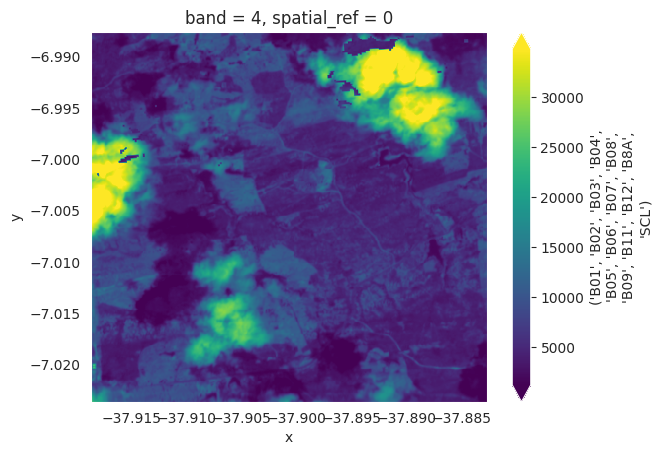

In [22]:
r_s2 = rxr.open_rasterio(df_s2.loc[0,'s2_image'], masked=True)
print(r_s2.rio.crs)
print(r_s2.rio.resolution())#10 in in degree
print(r_s2.rio.bounds())
r_s2.sel(band=4).plot(robust=True) #NIR
r_s2

EPSG:4326
(8.983111749909512e-05, -8.983111749910177e-05)
(-49.897707875437106, -3.982480200975567, -49.861775428437475, -3.9465477539759264)


<xarray.DataArray (band: 1, y: 400, x: 400)> Size: 160kB
[160000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 3kB -49.9 -49.9 -49.9 ... -49.86 -49.86 -49.86
  * y            (y) float64 3kB -3.947 -3.947 -3.947 ... -3.982 -3.982 -3.982
    spatial_ref  int64 8B 0
Attributes:
    ALERT_CODE:     1390023
    DATE_CREATED:   20250527
    DESCRIPTION:    Binary mask: 255=alert area, 0=background
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Alert Mask

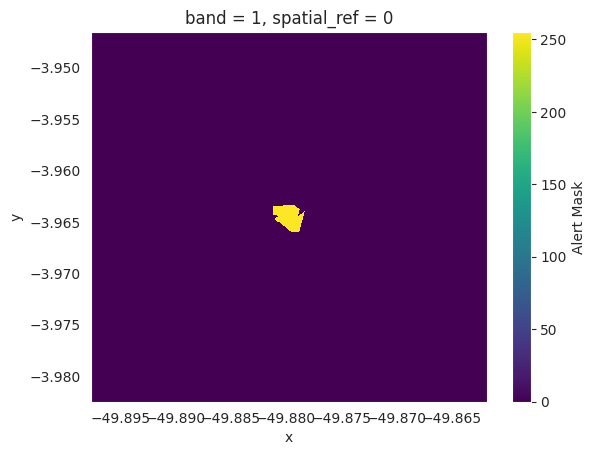

In [23]:
alert_id_val = df_s2.loc[0,'alert_id']
r_mask = rxr.open_rasterio(glob.glob(os.path.join(in_dir,'1390023','*_mask.tif'))[0])
print(r_mask.rio.crs) #latlong wgs84
print(r_mask.rio.resolution())#10 in in degree
print(r_mask.rio.bounds())
r_mask.plot()
r_mask

In [24]:
np.unique(r_mask.data,return_counts=True) #637 deforestation pixels

(array([  0, 255], dtype=uint8), array([159363,    637]))

Note mask and images of input features (bands) are of the same resolution because we are using Sentinel 1 and Sentinel 2.

#3.Match Sentinel1 and Sentinel 2 data with deforestation mask

##3.1 Matching Sentinel1 and Sentinel2 based on alert id

Let's match sentinel 1 and sentinel 2 imagery so that we can combine them in a model.

In [25]:
list_alert_id = list(df_s1['alert_id'].unique())

print(len(list_alert_id))
alert_id_val = list_alert_id[2]
print(alert_id_val)

print(df_s2.loc[df_s2['alert_id']==alert_id_val,:].shape)
print(df_s1.loc[df_s1['alert_id']==alert_id_val,:].shape)
#target is S1

df_s1_alert = df_s1.loc[df_s1['alert_id']==alert_id_val,:]
df_s1_alert['s1_date'] = pd.to_datetime(df_s1_alert['s1_date'])
df_s2_alert = df_s2.loc[df_s2['alert_id']==alert_id_val,:]
df_s2_alert['s2_date'] = pd.to_datetime(df_s2_alert['s2_date'])
df_s2_alert


df1 = df_s1_alert.copy()
df2 = df_s2_alert.copy()

col_name1 = 's1_date'
col_name2 = 's2_date'

if 'id' in df1.columns:
  #print('True')
  df1.rename(columns={'id':'id1'},inplace=True)
else:
  df1['id1'] = np.arange(1,df1.shape[0]+1)
  #print('False')
if 'id' in df2.columns:
  #print('True')
  df2.rename(columns={'id':'id2'},inplace=True)
else:
  df2['id2'] = np.arange(1,df2.shape[0]+1)
  #print('False')

matched_dates = []
for d in df1[col_name1]:
    closest = df2.iloc[(df2[col_name2] - d).abs().argmin()]
    matched_dates.append(closest)
# Combine results
match_df = df1.copy()
match_df = match_df.reset_index(drop=True)
pd.DataFrame(matched_dates).reset_index()[['id2','s2_date','s2_image']]
match_df[['id2', 's2_image','s2_date']] = pd.DataFrame(matched_dates).reset_index()[['id2', 's2_image',col_name2]]
match_df


44
1387927
(18, 5)
(4, 4)


/tmp/ipython-input-2344376508.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1_alert['s1_date'] = pd.to_datetime(df_s1_alert['s1_date'])
/tmp/ipython-input-2344376508.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s2_alert['s2_date'] = pd.to_datetime(df_s2_alert['s2_date'])


,files_json,s1_image,alert_id,s1_date,id1,id2,s2_image,s2_date
0,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20241208T083545_20241208T083610_056898_06FCE6_20241208_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20241208T083545_20241208T083610_056898_06FCE6_20241208.tif,1387927,2024-12-08,1,8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20241204T132231_N0511_R038_T23LNJ_20241204T160951_20241204.tif,2024-12-04
1,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20241220T083544_20241220T083609_057073_0703E8_20241220_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20241220T083544_20241220T083609_057073_0703E8_20241220.tif,1387927,2024-12-20,2,15,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2B_MSIL2A_20241219T132229_N0511_R038_T23LNK_20241219T183836_20241219.tif,2024-12-19
2,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20250101T083543_20250101T083608_057248_070ACF_20250101_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20250101T083543_20250101T083608_057248_070ACF_20250101.tif,1387927,2025-01-01,3,4,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2-16D_V2_032016_20250101_20250101.tif,2025-01-01
3,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20250113T083542_20250113T083607_057423_0711B9_20250113_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel1/1387927_sentinel1_S1A_IW_GRDH_1SDV_20250113T083542_20250113T083607_057423_0711B9_20250113.tif,1387927,2025-01-13,4,11,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387927/sentinel2/1387927_sentinel2_S2A_MSIL2A_20250113T132231_N0511_R038_T23LNK_20250113T164720_20250113.tif,2025-01-13


Now let's use the function

In [26]:
def match_closest_dates(df1: pd.DataFrame,
                        df2: pd.DataFrame,
                        col_name1: str,
                        col_name2: str)-> pd.DataFrame:

  if 'id' in df1.columns:
    #print('True')
    df1.rename(columns={'id':'id1'},inplace=True)
  else:
    df1['id1'] = np.arange(1,df1.shape[0]+1)
    #print('False')
  if 'id' in df2.columns:
    #print('True')
    df2.rename(columns={'id':'id2'},inplace=True)
  else:
    df2['id2'] = np.arange(1,df2.shape[0]+1)
    #print('False')

  matched_dates = []
  for d in df1[col_name1]:
      closest = df2.iloc[(df2[col_name2] - d).abs().argmin()]
      matched_dates.append(closest)
  # Combine results
  match_df = df1.copy()
  match_df = match_df.reset_index(drop=True)

  #pd.DataFrame(matched_dates).reset_index()[['id2','s2_date','s2_image']]
  match_df[['id2', 's2_image','s2_date']] = pd.DataFrame(matched_dates).reset_index()[['id2', 's2_image',col_name2]]

  return match_df

#better start from S1
list_alert_id = list(df_s1['alert_id'].unique())
list_matched_s1s2_alert_df = []
#matching files by event and date
for alert_id_val in list_alert_id:

  df_s1_alert = df_s1.loc[df_s1['alert_id']==alert_id_val,:]
  #df_s1_alert['s1_date'] = pd.to_datetime(df_s1_alert['s1_date'])
  df_s1_alert['s1_date'] = pd.to_datetime(df_s1_alert.loc[:,'s1_date'])

  df_s2_alert = df_s2.loc[df_s2['alert_id']==alert_id_val,:]
  #df_s2_alert['s2_date'] = pd.to_datetime(df_s2_alert['s2_date'])
  df_s2_alert['s2_date'] = pd.to_datetime(df_s2_alert.loc[:,'s2_date'])

  matched_s1s2_alert_df = match_closest_dates(
                      df1=df_s1_alert,
                      df2=df_s2_alert,
                      col_name1='s1_date',
                      col_name2='s2_date')
  list_matched_s1s2_alert_df.append(matched_s1s2_alert_df)

matched_s1s2_df = pd.concat(list_matched_s1s2_alert_df).reset_index(drop=True)
matched_s1s2_df


/tmp/ipython-input-161107007.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1_alert['s1_date'] = pd.to_datetime(df_s1_alert.loc[:,'s1_date'])
/tmp/ipython-input-161107007.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s2_alert['s2_date'] = pd.to_datetime(df_s2_alert.loc[:,'s2_date'])
/tmp/ipython-input-161107007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,files_json,s1_image,alert_id,s1_date,id1,id2,s2_image,s2_date
0,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122.tif,1387925,2025-01-22,1,10,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250124T125331_N0511_R052_T24MXT_20250124T152753_20250124.tif,2025-01-24
1,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203.tif,1387925,2025-02-03,2,11,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250203T125331_N0511_R052_T24MXT_20250203T153410_20250203.tif,2025-02-03
2,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215.tif,1387925,2025-02-15,3,12,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250213T125331_N0511_R052_T24MXT_20250213T155855_20250213.tif,2025-02-13
3,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205.tif,1387926,2024-12-05,1,7,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241205T125311_N0511_R052_T24MXU_20241205T155449_20241205.tif,2024-12-05
4,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217.tif,1387926,2024-12-17,2,8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241215T125311_N0511_R052_T24MXU_20241215T154948_20241215.tif,2024-12-15
...,...,...,...,...,...,...,...,...
157,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel1/1389968_sentinel1_S1A_IW_GRDH_1SDV_20250519T092441_20250519T092506_059261_075A9F_20250519_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel1/1389968_sentinel1_S1A_IW_GRDH_1SDV_20250519T092441_20250519T092506_059261_075A9F_20250519.tif,1389968,2025-05-19,3,8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel2/1389968_sentinel2_S2A_MSIL2A_20250517T140111_N0511_R067_T21LWK_20250517T190515_20250517.tif,2025-05-17
158,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel1/1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1390023/sentinel1/1390023_sentinel1_S1A_IW_GRDH_1SDV_20250504T085846_20250504T085911_059042_0752DB_20250504.ti

In [27]:
matched_s1s2_df['alert_id'].value_counts()


,count
alert_id,
1388078,8
1388047,8
1387950,6
1389891,5
1387993,4
1387981,4
1388059,4
1388051,4
1388045,4


In [28]:
files_df = matched_s1s2_df.merge(df_mask_val,on='alert_id')
files_df

,files_json,s1_image,alert_id,s1_date,id1,id2,s2_image,s2_date,mask,alert_date
0,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122.tif,1387925,2025-01-22,1,10,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250124T125331_N0511_R052_T24MXT_20250124T152753_20250124.tif,2025-01-24,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201
1,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203.tif,1387925,2025-02-03,2,11,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250203T125331_N0511_R052_T24MXT_20250203T153410_20250203.tif,2025-02-03,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201
2,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215.tif,1387925,2025-02-15,3,12,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250213T125331_N0511_R052_T24MXT_20250213T155855_20250213.tif,2025-02-13,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201
3,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205.tif,1387926,2024-12-05,1,7,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241205T125311_N0511_R052_T24MXU_20241205T155449_20241205.tif,2024-12-05,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/1387926_20250101_mask.tif,20250101
4,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217.tif,1387926,2024-12-17,2,8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241215T125311_N0511_R052_T24MXU_20241215T154948_20241215.tif,2024-12-15,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/1387926_20250101_mask.tif,20250101
...,...,...,...,...,...,...,...,...,...,...
157,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel1/1389968_sentinel1_S1A_IW_GRDH_1SDV_20250519T092441_20250519T092506_059261_075A9F_20250519_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel1/1389968_sentinel1_S1A_IW_GRDH_1SDV_20250519T092441_20250519T092506_059261_075A9F_20250519.tif,138

##3.2 Add bands information based on products


**S2-16D**

Data from Brazil Data Cube project:
- https://brazil-data-cube.github.io/products.html
- https://brazil-data-cube.github.io/products/cube-collections/S2-16D-2.html

**S2A_MSIL2A**

S2_L2A-1
- https://brazil-data-cube.github.io/products/image-collections/S2_L2A-1.html
https://sentiwiki.copernicus.eu/web/s2-products

**AWS Elements84**

https://radiantearth.github.io/stac-browser/#/external/earth-search.aws.element84.com/v1/collections/sentinel-2-c1-l2a?.language=en



In [29]:
band_values = {i: [] for i in range(4)}  # RGBN bands
band_values

{0: [], 1: [], 2: [], 3: []}

let's create a dict for each product

- S2-16D:
blue, green, red, NIR
B02,B03,B04,B08

2,3,4,8

BCD

In [30]:
'''
                        # Enhanced product type classification
                        if 'S2-16D' in base_name:
                            product_type = 'BDC_S2-16D'  # INPE 16-day mosaic
                        elif any(pattern in base_name for pattern in ['S2A_MSIL2A', 'S2B_MSIL2A', 'S2_L2A']):
                            product_type = 'BDC_S2_L2A'  # INPE Level-2A
                        else:
                            product_type = 'AWS'  # AWS/Element84 product

                        product = Sentinel2Product(
                            tif_path=tif_file,
                            bands_json_path=bands_json,
                            metadata_path=metadata_json,
                            product_type=product_type,
                            date=datetime.fromisoformat(metadata['datetime']) if metadata.get('datetime') else datetime.now()
                        )
                        products.append(product)
'''

"\n                        # Enhanced product type classification\n                        if 'S2-16D' in base_name:\n                            product_type = 'BDC_S2-16D'  # INPE 16-day mosaic\n                        elif any(pattern in base_name for pattern in ['S2A_MSIL2A', 'S2B_MSIL2A', 'S2_L2A']):\n                            product_type = 'BDC_S2_L2A'  # INPE Level-2A\n                        else:\n                            product_type = 'AWS'  # AWS/Element84 product\n\n                        product = Sentinel2Product(\n                            tif_path=tif_file,\n                            bands_json_path=bands_json,\n                            metadata_path=metadata_json,\n                            product_type=product_type,\n                            date=datetime.fromisoformat(metadata['datetime']) if metadata.get('datetime') else datetime.now()\n                        )\n                        products.append(product)\n"

From the documentation, it appears that we have teh same relevant bands for for all the products so we take a short cut and do not implement specific band loading per product. If given more time, I would do this differently.

#4.Train test split and Custom Dataset class

- can take 44
4 for testing
8 for validing
32 for training

To make it comparable we matched the s2 and s1

##4.1 Train-test split based on alerts

In [31]:
df_alerts = (files_df.groupby('alert_id')
         .agg({'s2_image':'count'})
         .sort_values('s2_image',ascending=False)
         .reset_index()
         .rename(columns={'s2_image':'count'})
)
print(df_alerts.shape)
print(df_alerts['count'].sum())
df_alerts

(44, 2)
162


,alert_id,count
0,1388078,8
1,1388047,8
2,1387950,6
3,1389891,5
4,1387993,4
5,1387981,4
6,1388059,4
7,1388051,4
8,1388045,4
9,1387926,4


In [32]:
if create_split is True:
  n_test = round(df_alerts.shape[0]*0.1)
  n_valid = round(df_alerts.shape[0]*0.1)
  n_train = df_alerts.shape[0]-n_test-n_valid
  print(n_train)
  print(n_test)
  print(n_valid)
  df_alerts_test = df_alerts.sample(n_test,random_state=random_seed)
  df_alerts_test.to_csv(f'alerts_test_{out_suffix}.csv')
  df_alerts_test

  print(df_alerts.loc[~df_alerts['alert_id'].isin(df_alerts_test['alert_id']),:].shape)
  df_alerts.loc[~df_alerts['alert_id'].isin(df_alerts_test['alert_id']),:]

  df_alerts_valid = df_alerts.loc[~df_alerts['alert_id'].isin(df_alerts_test['alert_id']),:].sample(n_valid,random_state=random_seed)
  df_alerts_valid.to_csv(f'alerts_valid_{out_suffix}.csv')
  df_alerts_valid

  df_alerts_train = (df_alerts.loc[~df_alerts['alert_id'].isin(df_alerts_test['alert_id']),:]
                              .loc[~df_alerts['alert_id'].isin(df_alerts_valid['alert_id']),:]
  )
  df_alerts_train.to_csv(f'alerts_train_{out_suffix}.csv')
  df_alerts_train
else:
  df_alerts_test = pd.read_csv(f'alerts_test_{out_suffix}.csv')
  df_alerts_valid = pd.read_csv(f'alerts_valid_{out_suffix}.csv')
  df_alerts_train = pd.read_csv(f'alerts_train_{out_suffix}.csv')

print(df_alerts_train.shape)
print(df_alerts_test.shape)
print(df_alerts_valid.shape)
len(files_df['s2_image'].to_list())


(36, 3)
(4, 3)
(4, 3)


162

In [33]:

files_df['type_val'] = 'none'
files_df.loc[files_df['alert_id'].isin(df_alerts_train['alert_id'].astype('str').to_list()),'type_val'] = 'train'
files_df.loc[files_df['alert_id'].isin(df_alerts_test['alert_id'].astype('str').to_list()),'type_val'] = 'test'
files_df.loc[files_df['alert_id'].isin(df_alerts_valid['alert_id'].astype('str').to_list()),'type_val'] = 'valid'
files_df.to_csv(f'files_df_{out_suffix}.csv')
print(files_df['type_val'].value_counts())

#checking for the correct count
(files_df.groupby(['type_val','alert_id'])['s2_image'].count()
        .reset_index()
        .rename(columns={'s2_image':'count'})
        #.sort_values('count',ascending=False)
        #.reset_index(drop=True)
        .groupby('type_val')['alert_id'].count()
)


type_val
train    133
test      15
valid     14
Name: count, dtype: int64


,alert_id
type_val,
test,4
train,36
valid,4


##4.2 Dataset class and data loader

In [34]:
s2_image_path = files_df.loc[0,'s2_image']
print(s2_image_path)
s2_image = rasterio.open(s2_image_path).read([1,2,3,4])
print(s2_image.shape)
print(s2_image.dtype)

s1_image_path = files_df.loc[0,'s1_image']
s1_image = rasterio.open(s1_image_path).read()
print(s1_image.shape)
print(s1_image.dtype)

label_path = files_df.loc[0,'mask']
label = rasterio.open(label_path).read()
print(label.shape)

/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250124T125331_N0511_R052_T24MXT_20250124T152753_20250124.tif
(4, 401, 401)
uint16
(2, 400, 400)
uint16
(1, 400, 400)


In [35]:
from albumentations.pytorch import ToTensorV2
import albumentations as A
import cv2
n_size=448
transform = A.Compose([
    A.Resize(height=n_size, width=n_size),  # Resize first
    ToTensorV2()                      # Then convert to tensor
])

transform_mask = A.Compose([
    A.Resize(height=n_size, width=n_size,interpolation=cv2.INTER_NEAREST),  # Resize first
    ToTensorV2()                      # Then convert to tensor
])

print(s2_image.shape)

s2_image_sample =np.moveaxis(s2_image, 0, 2)
print(s2_image_sample.shape)
s2_image_sample = transform(image=s2_image_sample)["image"]
print(s2_image_sample.shape)

label_sample = np.moveaxis(label, 0, 2)
#label_sample = np.moveaxis(label, 0, 2).astype('int64') #can't use resize then

print(label_sample.shape)
print(np.unique(label_sample))
#label_sample = transform_mask(image=s2_image,mask=label_sample,is_check_shapes=False)["mask"]
label_sample = transform_mask(image=label_sample)["image"]
print(label_sample.shape)
print(label_sample.dtype)

#label_sample = label_sample.long()     # Equivalent to tensor.to(torch.int64)
print(s2_image_sample.dtype)
print(label_sample.dtype)
s2_image_sample = s2_image_sample.to(dtype=torch.float32)
print(s2_image_sample.dtype)
print(label_sample.shape)
#label_sample.to(dtype=torch.float32


(4, 401, 401)
(401, 401, 4)
torch.Size([4, 448, 448])
(400, 400, 1)
[  0 255]
torch.Size([1, 448, 448])
torch.uint8
torch.uint16
torch.uint8
torch.float32
torch.Size([1, 448, 448])


(array([  0, 255], dtype=uint8), array([200583,    121]))


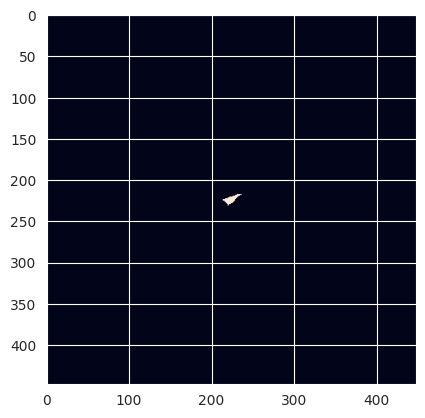

In [36]:
print(np.unique(label_sample.squeeze().numpy(),return_counts=True))
plt.imshow(label_sample.squeeze().numpy())

In [37]:
label_sample

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [38]:
import cv2
from albumentations.pytorch import ToTensorV2
import torch.nn.functional as F
import torchvision.transforms as T # Import torchvision transforms

class SegDataset(torch.utils.data.Dataset):
    def __init__(self, df, n_size = 448,transform=None,transform_mask=None,rescale=None,augmentation=None,s1=True):
        self.df = df #
        #self.label_dir = label_dir #target image with each pixel labeled as belonging to a class
        #self.transform = transform
        #self.images = os.listdir(image_dir) #make sure that the order match label images
        #self.labels = os.listdir(label_dir)
        self.n_size = n_size
        self.rescale = rescale
        self.augmentation = augmentation
        # Ensure the images and masks are sorted in the same order
        #self.images.sort()
        #self.labels.sort()
        # Use separate transforms for image and mask
        self.transform = transform
        self.transform_mask = transform_mask
        #self.image_transform = A.Compose([A.Resize(height=n_size, width=n_size), ToTensorV2()])
        #self.mask_transform = T.Resize(size=(n_size, n_size), interpolation=T.InterpolationMode.NEAREST)


        self.s2_images = df['s2_image'].to_list()
        self.labels = df['mask'].to_list()

        self.s1 = s1
        if self.s1:
          self.s1_images = df['s1_image']
    def __len__(self):
        return len(self.s2_images)

    def __getitem__(self, idx):
        s2_image_path = self.s2_images[idx]
        label_path = self.labels[idx]

        s2_image = rasterio.open(s2_image_path).read([2,3,4,8])
        label = rasterio.open(label_path).read() #+1
        label[label==255]=1 #this is hacky, should be improved
        #normalize and change data type, chnage band order
        #s2_image = s2_image.astype('float32')
        #label = label.astype('int64')
        #label = label.astype('float32') #if using crossEntropyLoss

        s2_image = np.moveaxis(s2_image, 0, 2) #move axis 1 to 3, i.e. channel axis should be last.
        label = np.moveaxis(label, 0, 2) #move axis 1 to 3, this is necessary for numpy
        if self.rescale=='min_max':
          s2_image = A.Normalize(normalization="min_max_per_channel")(image=s2_image)['image']
        elif self.rescale=='standard':
          s2_image = A.Normalize(normalization="standard")(image=s2_image)['image']
        else:
          s2_image = s2_image

        if self.augmentation: #if not none apply albumentation transform for augmentation
            # let's apply image transform to image feature and labels
            s2_image = self.augmentation(s2_image)
            #label = self.transform(label)
        #s2_image = A.Compose([(ToTensorV2())])(image=s2_image)['image']
        if self.transform:
          # Apply image transform first, which includes ToTensorV2
          s2_image = self.transform(image=s2_image)["image"]
        if self.transform_mask:
           # Apply mask transform first, which includes ToTensorV2
           label = self.transform_mask(image=label)["image"]

        # Convert mask to tensor before resizing
        #label_tensor = torch.from_numpy(label).permute(2, 0, 1).long() # Move channel to first dimension

        #label = F.one_hot(label, num_classes=3).squeeze().to(dtype=torch.float32) # converting to float32 after one hot encoding
        #label = label.permute(2,0,1)
        if self.s1:
          s1_image_path = self.s1_images[idx]
          s1_image = rasterio.open(s1_image_path).read()
          s1_image = s1_image.astype('float32')
          s1_image = np.moveaxis(s1_image, 0, 2) #move axis 1 to 3, i.e. channel axis should be last.
          if self.transform:
            # Apply image transform first, which includes ToTensorV2
            s1_image = self.transform(image=s1_image)["image"]

        #convert to correct data type
        label = label.long() #conversion
        #s2_image = s2_image.float()
        #s2_image = s2_image.to(dtype=torch.float32)
        if self.s1:
            s1_image = s1_image.to(dtype=torch.float32)

        if self.s1:
          return s2_image, s1_image, label
        else:
          return s2_image, label

In [39]:
files_df_train = files_df.loc[files_df['type_val']=='train',:].reset_index(drop=True)
files_df_test = files_df.loc[files_df['type_val']=='test',:].reset_index(drop=True)
files_df_valid = files_df.loc[files_df['type_val']=='valid',:].reset_index(drop=True)
print(files_df_train.shape)
print(files_df_test.shape)
print(files_df_valid.shape)

(133, 11)
(15, 11)
(14, 11)


In [40]:
files_df_train['s2_image'].to_list()[-2]

'/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389968/sentinel2/1389968_sentinel2_S2A_MSIL2A_20250507T140101_N0511_R067_T21LWK_20250507T165915_20250507.tif'

In [41]:
files_df_train

,files_json,s1_image,alert_id,s1_date,id1,id2,s2_image,s2_date,mask,alert_date,type_val
0,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250122T081004_20250122T081029_057554_0716E7_20250122.tif,1387925,2025-01-22,1,10,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250124T125331_N0511_R052_T24MXT_20250124T152753_20250124.tif,2025-01-24,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201,train
1,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250203T081003_20250203T081028_057729_071DD8_20250203.tif,1387925,2025-02-03,2,11,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250203T125331_N0511_R052_T24MXT_20250203T153410_20250203.tif,2025-02-03,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201,train
2,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel1/1387925_sentinel1_S1A_IW_GRDH_1SDV_20250215T081003_20250215T081028_057904_0724D9_20250215.tif,1387925,2025-02-15,3,12,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/sentinel2/1387925_sentinel2_S2C_MSIL2A_20250213T125331_N0511_R052_T24MXT_20250213T155855_20250213.tif,2025-02-13,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387925/1387925_20250201_mask.tif,20250201,train
3,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241205T080943_20241205T081008_056854_06FB30_20241205.tif,1387926,2024-12-05,1,7,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241205T125311_N0511_R052_T24MXU_20241205T155449_20241205.tif,2024-12-05,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/1387926_20250101_mask.tif,20250101,train
4,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel1/1387926_sentinel1_S1A_IW_GRDH_1SDV_20241217T080942_20241217T081007_057029_07021D_20241217.tif,1387926,2024-12-17,2,8,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/sentinel2/1387926_sentinel2_S2A_MSIL2A_20241215T125311_N0511_R052_T24MXU_20241215T154948_20241215.tif,2024-12-15,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1387926/1387926_20250101_mask.tif,20250101,train
...,...,...,...,...,...,...,...,...,...,...,...
128,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389891/sentinel1/1389891_sentinel1_S1A_IW_GRDH_1SDV_20250502T091639_20250502T091704_059013_0751BA_20250502_metadata.json,/content/gdrive/MyDrive/Colab Notebooks/capacity_data_challenge/data/1389891/sentinel1/1389891_sentinel1_S1A_IW_GRDH_1SDV_20250502T091639_202

In [42]:
train_dataset = SegDataset(df=files_df_train,
                         n_size=448,
                         transform=transform,
                         transform_mask=transform_mask,
                         rescale="min_max",
                         augmentation=None,
                         s1=True
                         )
val_dataset = SegDataset(df=files_df_valid,
                         n_size=448,
                         transform=transform,
                         transform_mask=transform_mask,
                         rescale="min_max",
                         augmentation=None,
                         s1=True
                         )
test_dataset = SegDataset(df=files_df_test,
                         n_size=448,
                         transform=transform,
                         transform_mask=transform_mask,
                         rescale="min_max",
                         augmentation=None,
                         s1=True
                         )

s2_image_sample, s1_image_sample,image_mask_sample = train_dataset[1]
print(type(s2_image_sample))
print(s2_image_sample.shape)
print(s2_image_sample.dtype)
print(s1_image_sample.shape)
print(s1_image_sample.dtype)
print(image_mask_sample.shape)
print(image_mask_sample.dtype)
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))
#print(image_feature.height)
#print(image_label.width)

<class 'torch.Tensor'>
torch.Size([4, 448, 448])
torch.float32
torch.Size([2, 448, 448])
torch.float32
torch.Size([1, 448, 448])
torch.int64
133
15
14


In [43]:
#print(s2_image_sample)
print(np.min(s2_image_sample.numpy()))
#plt.imshow(np.moveaxis(s2_image_sample.numpy(),0,2)
s2_image_sample

1.0084099e-05


tensor([[[0.0415, 0.0417, 0.0419,  ..., 0.0480, 0.0485, 0.0492],
         [0.0421, 0.0424, 0.0424,  ..., 0.0481, 0.0490, 0.0498],
         [0.0417, 0.0417, 0.0419,  ..., 0.0484, 0.0495, 0.0505],
         ...,
         [0.0911, 0.0891, 0.0868,  ..., 0.0328, 0.0330, 0.0331],
         [0.0815, 0.0803, 0.0789,  ..., 0.0321, 0.0323, 0.0326],
         [0.0755, 0.0748, 0.0739,  ..., 0.0316, 0.0317, 0.0319]],

        [[0.0456, 0.0456, 0.0414,  ..., 0.0449, 0.0471, 0.0474],
         [0.0415, 0.0404, 0.0426,  ..., 0.0607, 0.0584, 0.0600],
         [0.0398, 0.0397, 0.0488,  ..., 0.0810, 0.0645, 0.0629],
         ...,
         [0.1104, 0.1194, 0.1057,  ..., 0.0378, 0.0450, 0.0400],
         [0.1057, 0.1119, 0.0990,  ..., 0.0326, 0.0325, 0.0324],
         [0.1129, 0.1090, 0.0947,  ..., 0.0334, 0.0275, 0.0288]],

        [[0.1133, 0.1167, 0.1147,  ..., 0.1121, 0.1125, 0.1171],
         [0.1099, 0.1116, 0.1158,  ..., 0.1301, 0.1335, 0.1374],
         [0.1071, 0.1134, 0.1215,  ..., 0.1574, 0.1439, 0.

In [44]:
'''
print(np.min(s2_image_sample.numpy()))
print(np.max(s2_image_sample.numpy()))
plt.imshow(s2_image_sample.numpy())
print(np.unique(image_mask_sample.squeeze().numpy()))
plt.imshow(image_mask_sample.squeeze().numpy())
'''

'\nprint(np.min(s2_image_sample.numpy()))\nprint(np.max(s2_image_sample.numpy()))\nplt.imshow(s2_image_sample.numpy())\nprint(np.unique(image_mask_sample.squeeze().numpy()))\nplt.imshow(image_mask_sample.squeeze().numpy())\n'

In [45]:
batch_size = 4 # You can adjust this based on your system's memory

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print("DataLoaders created.")
print(train_dataloader.batch_size)
print(len(train_dataloader)) #256 images
print(len(train_dataloader)*train_dataloader.batch_size) #number of images if all 4 images per batch
len(train_dataset) #we have 1021 Sentinel 1 images, need to split these

DataLoaders created.
4
34
136


133

In [46]:
s2_image_sample, s1_image_sample, mask_image_sample = next(iter(train_dataloader))
print(s2_image_sample.shape)
print(s1_image_sample.shape)
print(mask_image_sample.shape)


torch.Size([4, 4, 448, 448])
torch.Size([4, 2, 448, 448])
torch.Size([4, 1, 448, 448])


torch.Size([3, 448, 448])


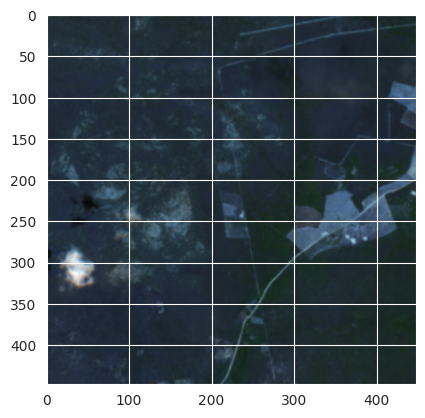

In [47]:
s2_img = s2_image_sample[3,0:3,:,:]
print(s2_img.shape)
plt.imshow(s2_img.permute(1,2,0))

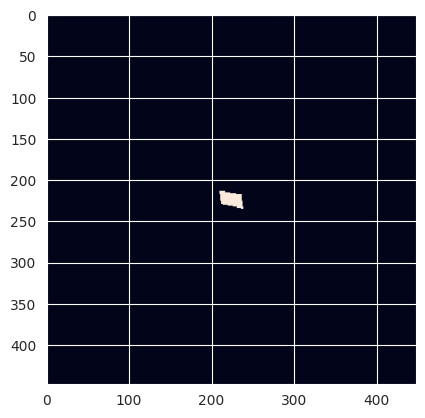

In [48]:
plt.imshow(mask_image_sample[3].squeeze())

In [49]:
print(np.unique(mask_image_sample[3].squeeze().numpy(),return_counts=True))

(array([0, 1]), array([200272,    432]))


In [50]:
'''
#Generate quick visualization using rasterio object
#scene_id="scene_id"
#scene_id = files_df['scene_id'][index_val]
from rasterio.plot import adjust_band

s2_img = s2_image_sample[3,0:3,:,:]

print(s2_img.shape)
s2_img = s2_img.permute(1,2,0) #band last need for plotting
s1_img = s1_image_sample[3,0:1,:,:].squeeze() #select one band and permute
mask = mask_image_sample[3,0,:,:].squeeze()
print(s2_img.shape)
print(s1_img.shape)
print(mask.shape)
scene_id='alert'
f, ax = plt.subplots(1, 3,figsize=(18,18))
ax.imshow(s2_img,title=scene_id,ax=ax[0])
ax.imshow(s1_img,title=scene_id,ax=ax[1]) #R,G,B are 4,3,2
ax.imshow(mask,title=scene_id+"Classes",ax=ax[2])
'''

'\n#Generate quick visualization using rasterio object\n#scene_id="scene_id"\n#scene_id = files_df[\'scene_id\'][index_val]\nfrom rasterio.plot import adjust_band\n\ns2_img = s2_image_sample[3,0:3,:,:]\n\nprint(s2_img.shape)\ns2_img = s2_img.permute(1,2,0) #band last need for plotting\ns1_img = s1_image_sample[3,0:1,:,:].squeeze() #select one band and permute\nmask = mask_image_sample[3,0,:,:].squeeze()\nprint(s2_img.shape)\nprint(s1_img.shape)\nprint(mask.shape)\nscene_id=\'alert\'\nf, ax = plt.subplots(1, 3,figsize=(18,18))\nax.imshow(s2_img,title=scene_id,ax=ax[0])\nax.imshow(s1_img,title=scene_id,ax=ax[1]) #R,G,B are 4,3,2\nax.imshow(mask,title=scene_id+"Classes",ax=ax[2])\n'

#5.Building models

##5.1 Simple unet with one input mode

In [51]:
#https://medium.com/@sooryanarayan_5231/training-a-unet-model-for-geospatial-deep-learning-a-step-by-step-guide-in-google-colab-84edfd8a94d9
import torch.nn.functional as F

class encoderBlock(nn.Module):
  def __init__(self,in_features, out_features):
    super(encoderBlock, self).__init__()

    self.convBlock =  nn.Sequential(
                                  nn.Conv2d(in_channels = in_features,
                                            out_channels= out_features,
                                            kernel_size=(3,3),
                                            stride =(1, 1),
                                            padding='same'),
                                  nn.BatchNorm2d(out_features),
                                  nn.ReLU(),
                                  nn.Conv2d(in_channels = out_features,
                                            out_channels= out_features,
                                            kernel_size=(3, 3),
                                            stride=(1,1),
                                            padding='same'),
                                  nn.BatchNorm2d(out_features),
                                  nn.ReLU(),
                                  )
    self.pool = nn.MaxPool2d((2, 2), stride=(2, 2))

  def forward(self, x):

      encoder =  self.convBlock(x)
      encoder_pool = self.pool(encoder)
      return encoder_pool, encoder

In [52]:
class decoderBlock(nn.Module):
  def __init__(self,in_features, out_features):
    super(decoderBlock, self).__init__()
    #512 in , out 256
    self.convTranspose =  nn.ConvTranspose2d(in_channels=in_features,out_channels=out_features, kernel_size=(2, 2), stride=(2, 2))
    self.batchnorm1 = nn.BatchNorm2d(in_features)
    self.conv1 = nn.Conv2d(in_channels=in_features,out_channels=out_features,kernel_size=(3,3),stride=(1,1),padding='same')
    self.batchnorm2 = nn.BatchNorm2d(out_features)
    self.conv2 = nn.Conv2d(in_channels=out_features,out_channels=out_features,kernel_size=(3,3),stride=(1,1),padding='same')

  def forward(self, x,concat_tensor):

      x =  self.convTranspose(x) #out shape: 256 channels
      x = torch.cat([x, concat_tensor], dim=1) #256+256 channels
      x = self.batchnorm1(x)#takes in 512 channels
      x = F.relu(x)
      x = self.conv1(x)#in: 512, out 256
      x = self.batchnorm2(x) #aded: in 256
      x = F.relu(x) #added
      x = self.conv2(x)#added: in 256 out 26
      x = self.batchnorm2(x) #in 2556
      decoder = F.relu(x)
      return decoder


In [53]:
#input_size is the number of inupt features e.g. 3 for RGB
class UnetModel(nn.Module):
  def __init__(self,input_size, num_classes):
    super(UnetModel, self).__init__()

    self.encoder_block1 =  encoderBlock(input_size,32)
    self.encoder_block2  =  encoderBlock(32,64)
    self.encoder_block3 =  encoderBlock(64,128)
    self.encoder_block4  =  encoderBlock(128,256)

    self.conv_block = nn.Conv2d(256,512, kernel_size=(3,3),stride=(1,1),padding='same') #change to 512

    self.decoder_block4 =  decoderBlock(512,256)
    self.decoder_block3  =  decoderBlock(256,128)
    self.decoder_block2 =  decoderBlock(128,64)
    self.decoder_block1  =  decoderBlock(64,32)

    self.classifier = nn.Sequential(
                                   nn.Conv2d(32,num_classes, kernel_size=(1, 1),stride=(1,1),padding='same'),
                                   #nn.Sigmoid()
                                   )

  def forward(self, x):
                                                    #3x256x256
    encoder1_pool, encoder1 = self.encoder_block1(x) #32x128x128
    encoder2_pool, encoder2 = self.encoder_block2(encoder1_pool) #64x64x64
    encoder3_pool, encoder3 = self.encoder_block3(encoder2_pool) #128x32x32
    encoder4_pool, encoder4 = self.encoder_block4(encoder3_pool) #output: 256x16x16

    center = self.conv_block(encoder4_pool) #512x16x16

    decoder4 = self.decoder_block4(center, encoder4) #output:256x32x32
    decoder3 = self.decoder_block3(decoder4,encoder3) #128x64x64
    decoder2 = self.decoder_block2(decoder3,encoder2) #64x128x128
    decoder1 = self.decoder_block1(decoder2,encoder1) #32x256x256

    outputs = self.classifier(decoder1) #1x256x256
    return outputs


In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_unet_s2 = UnetModel(input_size=4,num_classes=1).to(device)
model_unet_s2

UnetModel(
  (encoder_block1): encoderBlock(
    (convBlock): Sequential(
      (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (encoder_block2): encoderBlock(
    (convBlock): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (pool): Max

In [55]:
# Print a summary using torchinfo (uncomment for actual output)
#from torchsummary import summary
from torchinfo import summary

summary(model=model_unet_s2,
        input_size=(4, 4, 448, 448), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
UnetModel (UnetModel)                         [4, 4, 448, 448]     [4, 1, 448, 448]     --                   True
├─encoderBlock (encoder_block1)               [4, 4, 448, 448]     [4, 32, 224, 224]    --                   True
│    └─Sequential (convBlock)                 [4, 4, 448, 448]     [4, 32, 448, 448]    --                   True
│    │    └─Conv2d (0)                        [4, 4, 448, 448]     [4, 32, 448, 448]    1,184                True
│    │    └─BatchNorm2d (1)                   [4, 32, 448, 448]    [4, 32, 448, 448]    64                   True
│    │    └─ReLU (2)                          [4, 32, 448, 448]    [4, 32, 448, 448]    --                   --
│    │    └─Conv2d (3)                        [4, 32, 448, 448]    [4, 32, 448, 448]    9,248                True
│    │    └─BatchNorm2d (4)                   [4, 32, 448, 448]    [4, 32, 448, 448] 

Let's create model for sentinel 1 using the simple unet structure.

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_unet_s1 = UnetModel(input_size=2,num_classes=1).to(device)
model_unet_s1

UnetModel(
  (encoder_block1): encoderBlock(
    (convBlock): Sequential(
      (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (encoder_block2): encoderBlock(
    (convBlock): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (pool): Max

In [57]:
# Print a summary using torchinfo (uncomment for actual output)
#from torchsummary import summary
from torchinfo import summary

summary(model=model_unet_s1,
        input_size=(4, 2, 448, 448), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
UnetModel (UnetModel)                         [4, 2, 448, 448]     [4, 1, 448, 448]     --                   True
├─encoderBlock (encoder_block1)               [4, 2, 448, 448]     [4, 32, 224, 224]    --                   True
│    └─Sequential (convBlock)                 [4, 2, 448, 448]     [4, 32, 448, 448]    --                   True
│    │    └─Conv2d (0)                        [4, 2, 448, 448]     [4, 32, 448, 448]    608                  True
│    │    └─BatchNorm2d (1)                   [4, 32, 448, 448]    [4, 32, 448, 448]    64                   True
│    │    └─ReLU (2)                          [4, 32, 448, 448]    [4, 32, 448, 448]    --                   --
│    │    └─Conv2d (3)                        [4, 32, 448, 448]    [4, 32, 448, 448]    9,248                True
│    │    └─BatchNorm2d (4)                   [4, 32, 448, 448]    [4, 32, 448, 448] 

##5.2 Multimodal unet: A simple architecture

In [58]:
#from pytorch_lightning import LightningModule
import torch.nn as nn
import torch.nn.functional as F

In [59]:
class cnn_block(nn.Module):
  def __init__(self,in_features, out_features):
    super(cnn_block, self).__init__()

    self.convBlock =  nn.Sequential(
                                  nn.Conv2d(in_channels = in_features,
                                            out_channels= out_features,
                                            kernel_size=(3,3),
                                            stride =(1, 1),
                                            padding='same'),
                                  nn.BatchNorm2d(out_features),
                                  nn.ReLU(),
                                  nn.Conv2d(in_channels = out_features,
                                            out_channels= out_features,
                                            kernel_size=(3, 3),
                                            stride=(1,1),
                                            padding='same'),
                                  nn.BatchNorm2d(out_features),
                                  nn.ReLU()
    )

  def forward(self, x):
    cnn = self.convBlock(x)
    return cnn

In [60]:
#multi modality model:

#input_size is the number of inupt features e.g. 3 for RGB
class multiModal_UnetModel(nn.Module):
  def __init__(self,input_size1, input_size2, num_classes):
    super(multiModal_UnetModel, self).__init__()


    self.cnn_block_input1 = cnn_block(input_size1,16)
    self.cnn_block_input2 = cnn_block(input_size2,16)
    self.encoder_block1 =  encoderBlock(32,32)
    self.encoder_block2  =  encoderBlock(32,64)
    self.encoder_block3 =  encoderBlock(64,128)
    self.encoder_block4  =  encoderBlock(128,256)

    self.conv_block = nn.Conv2d(256,512, kernel_size=(3,3),stride=(1,1),padding='same') #change to 512

    self.decoder_block4 =  decoderBlock(512,256)
    self.decoder_block3  =  decoderBlock(256,128)
    self.decoder_block2 =  decoderBlock(128,64)
    self.decoder_block1  =  decoderBlock(64,32)

    self.classifier = nn.Sequential(
                                   nn.Conv2d(32,num_classes, kernel_size=(1, 1),stride=(1,1),padding='same'),
                                   #nn.Sigmoid()
                                   )

  def forward(self, x1,x2):

    x1 = self.cnn_block_input1(x1)
    x2 = self.cnn_block_input2(x2)
    x = torch.cat([x1, x2], dim=1)
                                                    #32x256x256
    encoder1_pool, encoder1 = self.encoder_block1(x) #32x128x128
    encoder2_pool, encoder2 = self.encoder_block2(encoder1_pool) #64x64x64
    encoder3_pool, encoder3 = self.encoder_block3(encoder2_pool) #128x32x32
    encoder4_pool, encoder4 = self.encoder_block4(encoder3_pool) #output: 256x16x16

    center = self.conv_block(encoder4_pool) #512x16x16

    decoder4 = self.decoder_block4(center, encoder4) #output:256x32x32
    decoder3 = self.decoder_block3(decoder4,encoder3) #128x64x64
    decoder2 = self.decoder_block2(decoder3,encoder2) #64x128x128
    decoder1 = self.decoder_block1(decoder2,encoder1) #32x256x256

    outputs = self.classifier(decoder1) #1x256x256
    return outputs


In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_unet_s1s2 = multiModal_UnetModel(input_size1=4,input_size2=2,num_classes=1).to(device)
model_unet_s1s2

multiModal_UnetModel(
  (cnn_block_input1): cnn_block(
    (convBlock): Sequential(
      (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (cnn_block_input2): cnn_block(
    (convBlock): Sequential(
      (0): Conv2d(2, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (encoder_block1): encoderBlock(
    (convBlock): Sequential(
      (0): Conv2d(32, 32, kernel_size

In [62]:
# Print a summary using torchinfo (uncomment for actual output)
#from torchsummary import summary
from torchinfo import summary

summary(model=model_unet_s1,
        input_size=(4, 2, 448, 448), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
UnetModel (UnetModel)                         [4, 2, 448, 448]     [4, 1, 448, 448]     --                   True
├─encoderBlock (encoder_block1)               [4, 2, 448, 448]     [4, 32, 224, 224]    --                   True
│    └─Sequential (convBlock)                 [4, 2, 448, 448]     [4, 32, 448, 448]    --                   True
│    │    └─Conv2d (0)                        [4, 2, 448, 448]     [4, 32, 448, 448]    608                  True
│    │    └─BatchNorm2d (1)                   [4, 32, 448, 448]    [4, 32, 448, 448]    64                   True
│    │    └─ReLU (2)                          [4, 32, 448, 448]    [4, 32, 448, 448]    --                   --
│    │    └─Conv2d (3)                        [4, 32, 448, 448]    [4, 32, 448, 448]    9,248                True
│    │    └─BatchNorm2d (4)                   [4, 32, 448, 448]    [4, 32, 448, 448] 

##5.3 Running Loss and batch training sample

Let's show one training for a batch

In [64]:
BCE_loss_fn = nn.BCEWithLogitsLoss()

class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()
    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)
        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth) / (inputs.sum() + targets.sum() + smooth)
        return 1 - dice

import torch
import torch.nn.functional as F

class CustomDiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(CustomDiceLoss, self).__init__()
        self.smooth = smooth
    def forward(self, pred, target):
        pred = torch.sigmoid(pred)
        intersection = (pred * target).sum(dim=(2, 3))
        union = pred.sum(dim=(2, 3)) + target.sum(dim=(2, 3))
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice.mean()

        #return torch.mean((predictions - targets) ** 2)
dice_loss_fn = CustomDiceLoss()

In [65]:
print(f"Currently using device: {device}")

s2_image_sample, s1_image_sample, mask_image_sample = next(iter(train_dataloader))
s2_image_sample = s2_image_sample.to(device)
s1_image_sample = s1_image_sample.to(device)
mask_image_sample = mask_image_sample.to(device)
print(s2_image_sample.shape)
print(mask_image_sample.shape)
# Forward pass
outputs = model_unet_s2(s2_image_sample)
print(outputs.shape) #these are logits values
loss = dice_loss_fn(outputs,mask_image_sample)
loss

Currently using device: cuda
torch.Size([4, 4, 448, 448])
torch.Size([4, 1, 448, 448])
torch.Size([4, 1, 448, 448])


tensor(0.9973, device='cuda:0', grad_fn=<RsubBackward1>)

In [66]:
#s2_image_sample, s1_image_sample, mask_image_sample = next(iter(train_dataloader))
print(s1_image_sample.shape)
print(mask_image_sample.shape)
# Forward pass
outputs = model_unet_s1(s1_image_sample)
print(outputs.shape) #these are logits values
loss = dice_loss_fn(outputs,mask_image_sample)
loss

torch.Size([4, 2, 448, 448])
torch.Size([4, 1, 448, 448])
torch.Size([4, 1, 448, 448])


tensor(0.9971, device='cuda:0', grad_fn=<RsubBackward1>)

In [67]:
#s2_image_sample, s1_image_sample, mask_image_sample = next(iter(train_dataloader))
print(s2_image_sample.shape)
print(s1_image_sample.shape)
print(mask_image_sample.shape)
# Forward pass
outputs = model_unet_s1s2(s2_image_sample,s1_image_sample)
print(outputs.shape) #these are logits values
loss = dice_loss_fn(outputs,mask_image_sample)
loss

torch.Size([4, 4, 448, 448])
torch.Size([4, 2, 448, 448])
torch.Size([4, 1, 448, 448])
torch.Size([4, 1, 448, 448])


tensor(0.9971, device='cuda:0', grad_fn=<RsubBackward1>)

#6.Model training

##6.1. Training Unet with Sentinel 2 only

In [68]:
import time

start = time.time()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently using device: {device}")


model_unet_s2 = UnetModel(input_size=4,num_classes=1).to(device)
#took about 3 minutes for one epochs with cpu
#took about 16 sec per epoch with cuda

loss_fn = CustomDiceLoss()

optimizer = torch.optim.Adam(model_unet_s2.parameters(), lr=0.01)

# 4. Training loop
epochs = 20
train_loss_list = []
list_df_train_loss = []
list_df_loss = []
list_df_loss_val = []
list_batch_number = []
for epoch in range(epochs):
  model_unet_s2.train(True) # Set model to training mode
  train_loss = 0.0
  for batch_val, data in enumerate(train_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data
    #move data to device
    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    #outputs = model_unet_s1s2(inputs)
    outputs = model_unet_s2(s2_image_sample)
    # Calculate loss
    loss = loss_fn(outputs,mask_image_sample)

    # Backward pass and optimization
    loss.backward()
    optimizer.step() #update the weights
    train_loss  += loss.item()
    df_loss_train = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
    list_df_loss.append(df_loss_train)

  df_train_loss_val = pd.DataFrame({'train_loss':[train_loss],
                                'epoch': [epoch]})
  train_loss_list.append(train_loss)
  list_df_train_loss.append(df_train_loss_val)

  ### Add validation

  list_df_pred = []
  model_unet_s2.eval() # Set model to avaluation mode
  val_loss = 0.0
  for batch_val, data in enumerate(val_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data
    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)
    # Zero the gradients
    # Forward pass
    with torch.inference_mode():
      outputs = model_unet_s2(s2_image_sample) #forward path
      # Find the Loss
      loss = loss_fn(outputs,mask_image_sample)
      # Calculate Loss
      val_loss += loss.item()
      df_loss_val = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
      list_df_loss_val.append(df_loss_val)


  ### Now print results
  print(f'Epoch {epoch+1}/{epochs}, train Loss: {train_loss:.4f}')
  print(f'Epoch {epoch+1}/{epochs}, val Loss: {val_loss:.4f}')

#maybe add validation
df_train_loss = pd.concat(list_df_train_loss)
df_val_loss = pd.concat(list_df_loss_val)
loss_df = pd.concat(list_df_loss).reset_index(drop=True)
loss_val_df = pd.concat(list_df_loss_val).reset_index(drop=True)

### Let's save the information:
#model_name = model_unet.name
model_name = 'model_unet_s2'
#loss_df = pd.concat(list_df_loss)
# save to csv:
loss_train_csv_file = f'loss_train_{model_name}_{out_suffix}.csv'
loss_df.to_csv(loss_train_csv_file,index=False)
loss_val_csv_file = f'loss_val_{model_name}_{out_suffix}.csv'
loss_val_df.to_csv(loss_val_csv_file,index=False)

#save model in output dir
output_model_filename = f'{model_name}_{out_suffix}.pth'
torch.save(model_unet_s2.state_dict(), os.path.join(out_dir,output_model_filename))

end = time.time()
print("Execution time:", end - start, "seconds")


Currently using device: cuda
Epoch 1/20, train Loss: 33.4202
Epoch 1/20, val Loss: 3.9556
Epoch 2/20, train Loss: 33.1111
Epoch 2/20, val Loss: 3.9521
Epoch 3/20, train Loss: 32.7786
Epoch 3/20, val Loss: 3.9861
Epoch 4/20, train Loss: 32.8995
Epoch 4/20, val Loss: 3.9530
Epoch 5/20, train Loss: 32.8237
Epoch 5/20, val Loss: 3.9716
Epoch 6/20, train Loss: 32.7692
Epoch 6/20, val Loss: 3.9871
Epoch 7/20, train Loss: 32.6120
Epoch 7/20, val Loss: 3.9644
Epoch 8/20, train Loss: 32.5068
Epoch 8/20, val Loss: 3.9604
Epoch 9/20, train Loss: 32.5406
Epoch 9/20, val Loss: 3.9650
Epoch 10/20, train Loss: 32.3340
Epoch 10/20, val Loss: 3.9934
Epoch 11/20, train Loss: 33.0586
Epoch 11/20, val Loss: 3.9665
Epoch 12/20, train Loss: 32.6876
Epoch 12/20, val Loss: 3.9630
Epoch 13/20, train Loss: 32.4281
Epoch 13/20, val Loss: 3.9684
Epoch 14/20, train Loss: 32.3626
Epoch 14/20, val Loss: 3.9750
Epoch 15/20, train Loss: 32.4831
Epoch 15/20, val Loss: 3.9946
Epoch 16/20, train Loss: 32.7284
Epoch 16/20

In [69]:
!ls -ltr

total 63944
drwx------ 2 root root     4096 Aug 12 16:41 alert_imagery
-rw------- 1 root root       66 Aug 14 14:28 alerts_test.csv
-rw------- 1 root root      119 Aug 14 14:35 alerts_valid.csv
-rw------- 1 root root       67 Aug 15 14:39 alerts_valid_test_20250812.csv
-rw------- 1 root root      476 Aug 15 14:39 alerts_train_test_20250812.csv
-rw------- 1 root root       67 Aug 15 14:39 alerts_test_test_20250812.csv
-rw------- 1 root root    55074 Aug 17 09:48 model_unet_training_loss_comparison_test_20250812.png
-rw------- 1 root root    37841 Aug 17 19:20 model_unet_s1_training_loss_comparison_test_20250812.png
-rw------- 1 root root     1987 Aug 17 19:20 loss_val_model_unet_s1_test_20250812.csv
-rw------- 1 root root    17222 Aug 17 19:20 loss_train_model_unet_s1_test_20250812.csv
-rw------- 1 root root 21683898 Aug 17 19:20 model_unet_s1_test_20250812.pth
-rw------- 1 root root    17184 Aug 17 19:26 loss_train_model_unet_s1s2_test_20250812.csv
-rw------- 1 root root     1977 Aug 1

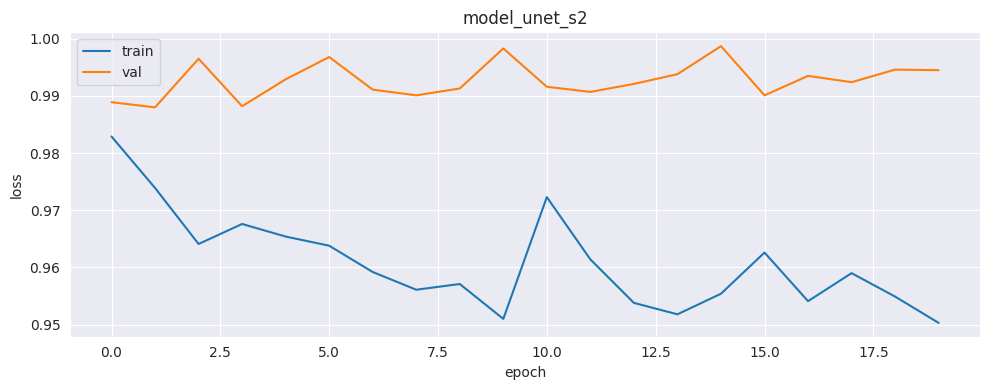

In [70]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
plot_col = 'mean_loss'
model_name = 'model_unet_s2'
#df_loss_agg = loss_df

df_loss_train_agg = loss_df
df_loss_val_agg = loss_val_df
df_loss_train_agg = (df_loss_train_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )
df_loss_val_agg = (df_loss_val_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )

df_loss_val_agg['loss']= round(df_loss_val_agg[plot_col],4)
df_loss_train_agg['loss']= round(df_loss_train_agg[plot_col],4)

df_loss_val_agg.rename(columns={'loss':'val_loss'},inplace=True)
df_loss_train_agg.rename(columns={'loss':'train_loss'},inplace=True)

df_loss_agg = (pd.concat([
    df_loss_val_agg.drop(columns=['mean_loss','sum_loss']),
    df_loss_train_agg.drop(columns=['epoch','mean_loss','sum_loss'])],axis=1))
df_loss_agg

ax.ticklabel_format(useOffset=False)
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['train_loss'].values,
                    label='train')
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['val_loss'].values,
                    label='val')
#ax[model_val].plot(hist_df['epoch'],hist_df['val_accuracy'],label='val')
ax.set_title(model_name)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()

fig.tight_layout()
plt.savefig(f'{model_name}_training_loss_comparison_{out_suffix}.png')

While there is a decrease in loss, the validation curve seems to wildly change. More in depth look at the training with learning rate scheduler may help.

##6.2 Training Unet with Sentinel 1 only

In [71]:
#if run_model==True:

import time

start = time.time()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_unet_s1 = UnetModel(input_size=2,num_classes=1).to(device)
#took about 3 minutes for one epochs
loss_fn = CustomDiceLoss()
optimizer = torch.optim.Adam(model_unet_s1.parameters(), lr=0.01)

# 4. Training loop
epochs = 20
train_loss_list = []
list_df_train_loss = []
list_df_loss = []
list_df_loss_val = []
list_batch_number = []
for epoch in range(epochs):
  model_unet_s1.train(True) # Set model to training mode
  train_loss = 0.0
  for batch_val, data in enumerate(train_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data
    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    #outputs = model_unet_s1s2(inputs)
    outputs = model_unet_s1(s1_image_sample)
    # Calculate loss
    loss = loss_fn(outputs,mask_image_sample)

    # Backward pass and optimization
    loss.backward()
    optimizer.step() #update the weights
    train_loss  += loss.item()
    df_loss_train = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
    list_df_loss.append(df_loss_train)

  df_train_loss_val = pd.DataFrame({'train_loss':[train_loss],
                                'epoch': [epoch]})
  train_loss_list.append(train_loss)
  list_df_train_loss.append(df_train_loss_val)

  ### Add validation

  list_df_pred = []
  model_unet_s1.eval() # Set model to avaluation mode
  val_loss = 0.0
  for batch_val, data in enumerate(val_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data

    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)

    # Zero the gradients
    # Forward pass
    with torch.inference_mode():
      outputs = model_unet_s1(s1_image_sample) #forward path
      # Find the Loss
      loss = loss_fn(outputs,mask_image_sample)
      # Calculate Loss
      val_loss += loss.item()
      df_loss_val = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
      list_df_loss_val.append(df_loss_val)


  ### Now print results
  print(f'Epoch {epoch+1}/{epochs}, train Loss: {train_loss:.4f}')
  print(f'Epoch {epoch+1}/{epochs}, val Loss: {val_loss:.4f}')

#maybe add validation
df_train_loss = pd.concat(list_df_train_loss)
df_val_loss = pd.concat(list_df_loss_val)
loss_df = pd.concat(list_df_loss).reset_index(drop=True)
loss_val_df = pd.concat(list_df_loss_val).reset_index(drop=True)

### Let's save the information:
#model_name = model_unet.name
model_name = 'model_unet_s1'
#loss_df = pd.concat(list_df_loss)
# save to csv:
loss_train_csv_file = f'loss_train_{model_name}_{out_suffix}.csv'
loss_df.to_csv(loss_train_csv_file,index=False)
loss_val_csv_file = f'loss_val_{model_name}_{out_suffix}.csv'
loss_val_df.to_csv(loss_val_csv_file,index=False)

#save model in output dir
output_model_filename = f'{model_name}_{out_suffix}.pth'
torch.save(model_unet_s1.state_dict(), os.path.join(out_dir,output_model_filename))

end = time.time()
print("Execution time:", end - start, "seconds")


Epoch 1/20, train Loss: 33.5732
Epoch 1/20, val Loss: 3.9662
Epoch 2/20, train Loss: 33.4981
Epoch 2/20, val Loss: 3.9652
Epoch 3/20, train Loss: 33.5207
Epoch 3/20, val Loss: 3.9669
Epoch 4/20, train Loss: 33.4525
Epoch 4/20, val Loss: 3.9625
Epoch 5/20, train Loss: 33.5157
Epoch 5/20, val Loss: 3.9641
Epoch 6/20, train Loss: 33.2899
Epoch 6/20, val Loss: 3.9654
Epoch 7/20, train Loss: 33.4262
Epoch 7/20, val Loss: 3.9677
Epoch 8/20, train Loss: 33.2341
Epoch 8/20, val Loss: 3.9740
Epoch 9/20, train Loss: 33.2109
Epoch 9/20, val Loss: 3.9805
Epoch 10/20, train Loss: 33.1535
Epoch 10/20, val Loss: 3.9844
Epoch 11/20, train Loss: 33.2539
Epoch 11/20, val Loss: 3.9672
Epoch 12/20, train Loss: 33.2106
Epoch 12/20, val Loss: 3.9683
Epoch 13/20, train Loss: 33.0970
Epoch 13/20, val Loss: 3.9786
Epoch 14/20, train Loss: 33.1971
Epoch 14/20, val Loss: 3.9831
Epoch 15/20, train Loss: 33.0833
Epoch 15/20, val Loss: 3.9477
Epoch 16/20, train Loss: 33.1474
Epoch 16/20, val Loss: 3.9727
Epoch 17/2

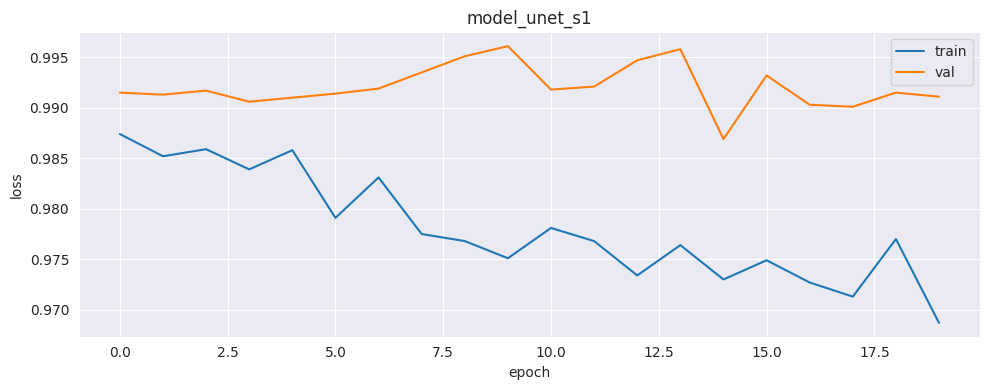

In [72]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
plot_col = 'mean_loss'
model_name = 'model_unet_s1'
#df_loss_agg = loss_df

df_loss_train_agg = loss_df
df_loss_val_agg = loss_val_df
df_loss_train_agg = (df_loss_train_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )
df_loss_val_agg = (df_loss_val_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )

df_loss_val_agg['loss']= round(df_loss_val_agg[plot_col],4)
df_loss_train_agg['loss']= round(df_loss_train_agg[plot_col],4)

df_loss_val_agg.rename(columns={'loss':'val_loss'},inplace=True)
df_loss_train_agg.rename(columns={'loss':'train_loss'},inplace=True)

df_loss_agg = (pd.concat([
    df_loss_val_agg.drop(columns=['mean_loss','sum_loss']),
    df_loss_train_agg.drop(columns=['epoch','mean_loss','sum_loss'])],axis=1))
df_loss_agg

ax.ticklabel_format(useOffset=False)
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['train_loss'].values,
                    label='train')
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['val_loss'].values,
                    label='val')
#ax[model_val].plot(hist_df['epoch'],hist_df['val_accuracy'],label='val')
ax.set_title(model_name)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()

fig.tight_layout()
plt.savefig(f'{model_name}_training_loss_comparison_{out_suffix}.png')

This plot of loss show some problematic training issues. While the training loss is decreasing. The validation loss is barely changing after eopoch 5.

##6.3 Training Multimodal Unet with Sentinel 2 and Sentinel 1

In [73]:
import time
start = time.time()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_unet_s1s2 = multiModal_UnetModel(input_size1=4,
                                       input_size2=2,
                                       num_classes=1).to(device)

#took about 5 minutes per epoch in cpu
#took about 15.75 second per epoch in cuda

loss_fn = CustomDiceLoss()
optimizer = torch.optim.Adam(model_unet_s1s2.parameters(), lr=0.01)

# 4. Training loop
epochs = 20
train_loss_list = []
list_df_train_loss = []
list_df_loss = []
list_df_loss_val = []
list_batch_number = []
for epoch in range(epochs):
  model_unet_s1s2.train(True) # Set model to training mode
  train_loss = 0.0
  for batch_val, data in enumerate(train_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data

    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)

    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    #outputs = model_unet_s1s2(inputs)
    outputs = model_unet_s1s2(s2_image_sample,s1_image_sample)
    # Calculate loss
    loss = loss_fn(outputs,mask_image_sample)

    # Backward pass and optimization
    loss.backward()
    optimizer.step() #update the weights
    train_loss  += loss.item()
    df_loss_train = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
    list_df_loss.append(df_loss_train)

  df_train_loss_val = pd.DataFrame({'train_loss':[train_loss],
                                'epoch': [epoch]})
  train_loss_list.append(train_loss)
  list_df_train_loss.append(df_train_loss_val)

  ### Add validation

  list_df_pred = []
  model_unet_s1s2.eval() # Set model to avaluation mode
  val_loss = 0.0
  for batch_val, data in enumerate(val_dataloader):
    s2_image_sample, s1_image_sample, mask_image_sample = data

    s2_image_sample = s2_image_sample.to(device)
    s1_image_sample = s1_image_sample.to(device)
    mask_image_sample = mask_image_sample.to(device)

    # Zero the gradients
    # Forward pass
    with torch.inference_mode():
      outputs = model_unet_s1s2(s2_image_sample,s1_image_sample) #forward path
      # Find the Loss
      loss = loss_fn(outputs,mask_image_sample)
      # Calculate Loss
      val_loss += loss.item()
      df_loss_val = pd.DataFrame({'batch_number':[batch_val],
                            'loss':[loss.item()],
                            'epoch': [epoch]})
      list_df_loss_val.append(df_loss_val)


  ### Now print results
  print(f'Epoch {epoch+1}/{epochs}, train Loss: {train_loss:.4f}')
  print(f'Epoch {epoch+1}/{epochs}, val Loss: {val_loss:.4f}')

#maybe add validation
df_train_loss = pd.concat(list_df_train_loss)
df_val_loss = pd.concat(list_df_loss_val)
loss_df = pd.concat(list_df_loss).reset_index(drop=True)
loss_val_df = pd.concat(list_df_loss_val).reset_index(drop=True)


### Let's save the information:
#model_name = model_unet.name
model_name = 'model_unet_s1s2'
#loss_df = pd.concat(list_df_loss)
# save to csv:
loss_train_csv_file = f'loss_train_{model_name}_{out_suffix}.csv'
loss_df.to_csv(loss_train_csv_file,index=False)
loss_val_csv_file = f'loss_val_{model_name}_{out_suffix}.csv'
loss_val_df.to_csv(loss_val_csv_file,index=False)

#save model in output dir
output_model_filename = f'{model_name}_{out_suffix}.pth'
torch.save(model_unet_s1s2.state_dict(), os.path.join(out_dir,output_model_filename))

end = time.time()
print("Execution time:", end - start, "seconds")

Epoch 1/20, train Loss: 33.4899
Epoch 1/20, val Loss: 3.9584
Epoch 2/20, train Loss: 33.3180
Epoch 2/20, val Loss: 3.9603
Epoch 3/20, train Loss: 33.3134
Epoch 3/20, val Loss: 3.9642
Epoch 4/20, train Loss: 32.9918
Epoch 4/20, val Loss: 3.9609
Epoch 5/20, train Loss: 33.0939
Epoch 5/20, val Loss: 3.9944
Epoch 6/20, train Loss: 32.7562
Epoch 6/20, val Loss: 3.9688
Epoch 7/20, train Loss: 33.0117
Epoch 7/20, val Loss: 3.9673
Epoch 8/20, train Loss: 32.5037
Epoch 8/20, val Loss: 3.9920
Epoch 9/20, train Loss: 32.7763
Epoch 9/20, val Loss: 3.9648
Epoch 10/20, train Loss: 32.6522
Epoch 10/20, val Loss: 3.9762
Epoch 11/20, train Loss: 32.5361
Epoch 11/20, val Loss: 3.9783
Epoch 12/20, train Loss: 32.4025
Epoch 12/20, val Loss: 3.9732
Epoch 13/20, train Loss: 32.2433
Epoch 13/20, val Loss: 3.9659
Epoch 14/20, train Loss: 32.5142
Epoch 14/20, val Loss: 3.9718
Epoch 15/20, train Loss: 32.2737
Epoch 15/20, val Loss: 3.9780
Epoch 16/20, train Loss: 32.8146
Epoch 16/20, val Loss: 3.9730
Epoch 17/2

In [74]:
!ls -ltr

total 63953
drwx------ 2 root root     4096 Aug 12 16:41 alert_imagery
-rw------- 1 root root       66 Aug 14 14:28 alerts_test.csv
-rw------- 1 root root      119 Aug 14 14:35 alerts_valid.csv
-rw------- 1 root root       67 Aug 15 14:39 alerts_valid_test_20250812.csv
-rw------- 1 root root      476 Aug 15 14:39 alerts_train_test_20250812.csv
-rw------- 1 root root       67 Aug 15 14:39 alerts_test_test_20250812.csv
-rw------- 1 root root    55074 Aug 17 09:48 model_unet_training_loss_comparison_test_20250812.png
-rw------- 1 root root    42969 Aug 17 19:26 model_unet_s1s2_training_loss_comparison_test_20250812.png
-rw------- 1 root root   113431 Aug 17 20:22 files_df_test_20250812.csv
-rw------- 1 root root    16406 Aug 17 20:32 loss_train_model_unet_s2_test_20250812.csv
-rw------- 1 root root     1891 Aug 17 20:32 loss_val_model_unet_s2_test_20250812.csv
-rw------- 1 root root 21686202 Aug 17 20:32 model_unet_s2_test_20250812.pth
-rw------- 1 root root    44761 Aug 17 20:32 model_un

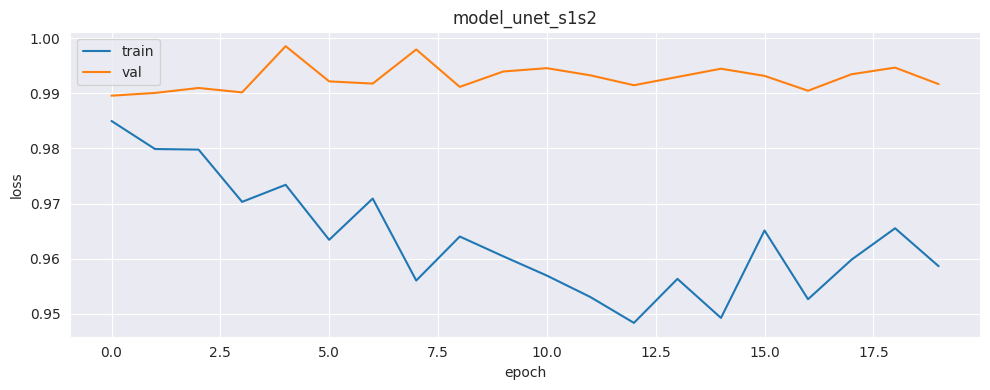

In [75]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
plot_col = 'mean_loss'
model_name = 'model_unet_s1s2'
#df_loss_agg = loss_df

df_loss_train_agg = loss_df
df_loss_val_agg = loss_val_df
df_loss_train_agg = (df_loss_train_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )
df_loss_val_agg = (df_loss_val_agg.groupby('epoch')
                    .agg({'loss':['mean','sum']})
                    .set_axis(['mean_loss','sum_loss'],axis=1)
                    .reset_index()
                    )

df_loss_val_agg['loss']= round(df_loss_val_agg[plot_col],4)
df_loss_train_agg['loss']= round(df_loss_train_agg[plot_col],4)

df_loss_val_agg.rename(columns={'loss':'val_loss'},inplace=True)
df_loss_train_agg.rename(columns={'loss':'train_loss'},inplace=True)

df_loss_agg = (pd.concat([
    df_loss_val_agg.drop(columns=['mean_loss','sum_loss']),
    df_loss_train_agg.drop(columns=['epoch','mean_loss','sum_loss'])],axis=1))
df_loss_agg

ax.ticklabel_format(useOffset=False)
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['train_loss'].values,
                    label='train')
ax.plot(df_loss_agg['epoch'].values,
                    df_loss_agg['val_loss'].values,
                    label='val')
#ax[model_val].plot(hist_df['epoch'],hist_df['val_accuracy'],label='val')
ax.set_title(model_name)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()

fig.tight_layout()
plt.savefig(f'{model_name}_training_loss_comparison_{out_suffix}.png')

# 7.Accurary Assessment and model evaluation

We will assess the model using the test data. The steps as follow:

1. generate test samples and predict using the fitted model
2. visualize outputs as raster map
3. compute accuracy metrics using the ROC and AUC.
4. examine precision and recall for specific threshold
5. create a precision-recall curve
6. produce a IOU metric


In #2, we visualize the new prediction. First,we visualize the output probabilities from the model
(continuous value between 0 and 1). Second, we generate class prediction by using by setting the treshold to 0.5. Any pixel with probability higher than
0.5 is classified as building. A boolean map of error is generated to visualize the matrix of confusion at the pixel level.

In #3, we compute the ROC and AUC for all 10 test chip image. We also generate ROC plots and save results in a data frame.

There are only four batches in the test data loader because the test dataset only contains 15 images.

##7.1 Visualizing outputs predictions on test data

Sentinel 2 batch shape: torch.Size([4, 4, 448, 448])
Sentinel 1 batch shape: torch.Size([4, 2, 448, 448])
Mask batch shape: torch.Size([4, 1, 448, 448])
torch.Size([3, 448, 448])


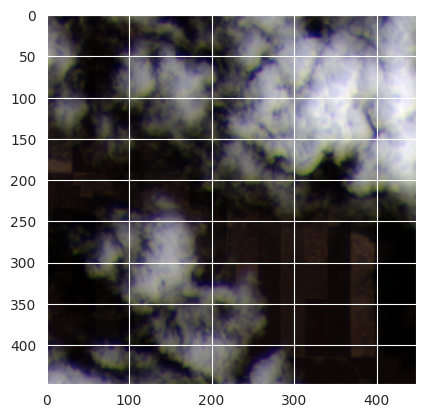

In [76]:
# Display image and label.
test_s2_image, test_s1_image, test_labels = next(iter(test_dataloader))
print(f"Sentinel 2 batch shape: {test_s2_image.size()}")
print(f"Sentinel 1 batch shape: {test_s1_image.size()}")
print(f"Mask batch shape: {test_labels.size()}")
#img = test_features[0].squeeze()
label = test_labels[0].shape
s2_img = test_s2_image[2,0:3,:,:]
print(s2_img.shape)
s2_img = s2_img.permute(1,2,0)
plt.imshow(s2_img[:,:,[2,1,0]])

torch.Size([1, 448, 448])


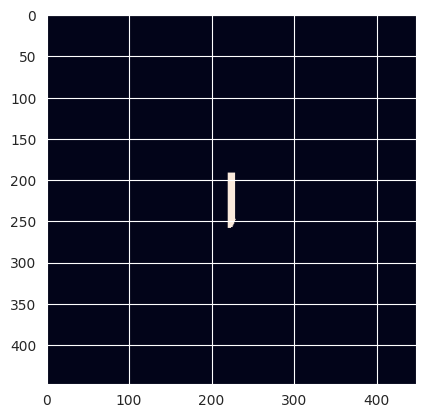

In [77]:
label = test_labels[2]
print(label.shape)
plt.imshow(label.squeeze())

In [78]:
np.unique(label)

array([0, 1])

Let's predict on a the first test batch of images and let's look at image we plotted before (this is image number 2).

In [79]:
#predictions = model.predict(w_X_test)
#model = list_models[2]
model_unet_s1s2.eval()
y_score_logits = model_unet_s1s2(test_s2_image.to(device),
                           test_s1_image.to(device))
print(y_score_logits.shape)

#y_score_logits = model_unet(test_features)
print(y_score_logits.shape)
y_scores = nn.Softmax(dim=1)(y_score_logits) #these are the proba
print(y_scores.sum(dim=1))
print(y_scores)
y_pred_test = torch.argmax(y_scores, dim=1)  # Returns [1, 2]
#class_names[y_pred_test]
print(y_scores.shape)
print(y_scores[0,:,:,:].shape)
print(test_labels[0,:,:,:].shape)
y_scores[0,:,:,:] #gettting the first image predicted

torch.Size([4, 1, 448, 448])
torch.Size([4, 1, 448, 448])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]], device='cuda:0',
       grad_fn=<SliceBackward0>)

This is the multimodal prediction output.

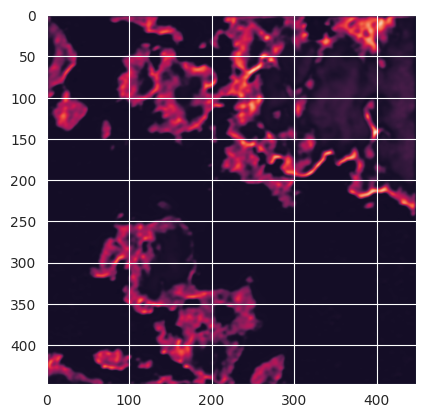

In [80]:
y_score_logits[1].shape
plt.imshow(y_score_logits[2].cpu().detach().numpy().squeeze())
#plt.imshow(y_scores[2].cpu().detach().numpy().squeeze())

We can see that wee are predicting the clouds rather than the forested area. We probably need to go back to understand more about the mask or weight more the deforestation class.

**Model s2 test**

In [81]:
def pred_on_batch_and_plot(model,
                           test_s2_image,
                           test_s1_image,
                           test_labels,
                           img_index=0):

  label = test_labels[img_index].shape
  if test_s2_image is not None:
    s2_img = test_s2_image[img_index,0:3,:,:]
    s2_img = s2_img.permute(1,2,0)
    plt.imshow(s2_img[:,:,[2,1,0]])
  #print(s2_img.shape)
  if test_s1_image is not None:
    s1_img = test_s1_image[img_index,0,:,:]
    plt.imshow(s1_img,cmap='gray')

  model.eval()

  if test_s1_image is None:
    y_score_logits = model(test_s2_image.to(device))
  if test_s2_image is None:
    y_score_logits = model(test_s1_image.to(device))
  elif (test_s1_image is not None) and (test_s2_image is not None):
    y_score_logits = model(test_s2_image.to(device),
                            test_s1_image.to(device))

  print(y_score_logits.shape)
  plt.imshow(y_score_logits[img_index].cpu().detach().numpy().squeeze())

  y_scores = nn.Softmax(dim=1)(y_score_logits) #these are the proba
  #print(y_scores.sum(dim=1))
  #print(y_scores)

  plt.imshow(y_score_logits[img_index].cpu().detach().numpy().squeeze())

  return y_score_logits

torch.Size([4, 1, 448, 448])


tensor([[[[-10.9178, -10.0958, -10.0473,  ..., -10.3603, -10.3529, -10.9911],
          [ -9.2068,  -7.2577,  -7.1544,  ...,  -7.7077,  -7.7072,  -9.4672],
          [ -9.1759,  -7.1505,  -6.9690,  ...,  -7.6726,  -7.6793,  -9.4517],
          ...,
          [ -9.3234,  -7.6097,  -7.6069,  ...,   8.8881,   2.2868,  -7.4023],
          [ -9.3130,  -7.5921,  -7.5923,  ...,   8.4565,   1.2393,  -7.6966],
          [ -9.6311,  -8.3267,  -8.3180,  ...,   3.2881,  -3.8005,  -9.0006]]],


        [[[-11.0505, -10.3732, -10.3853,  ..., -10.3920, -10.3768, -11.0090],
          [ -9.3557,  -7.7347,  -7.7358,  ...,  -7.7110,  -7.7129,  -9.4783],
          [ -9.3228,  -7.6912,  -7.6860,  ...,  -7.6101,  -7.6477,  -9.4489],
          ...,
          [ -9.2820,  -7.6077,  -7.5840,  ...,  -7.6208,  -7.6707,  -9.4726],
          [ -9.2635,  -7.5644,  -7.5454,  ...,  -7.6726,  -7.6866,  -9.4776],
          [ -9.5660,  -8.2370,  -8.2104,  ...,  -8.4488,  -8.4508,  -9.9250]]],


        [[[-10.9369, -10.0

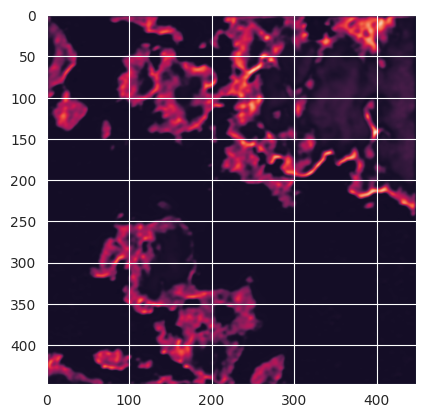

In [82]:
y_score_logits_s1s2 = pred_on_batch_and_plot(model=model_unet_s1s2,
                           test_s2_image=test_s2_image,
                           test_s1_image=test_s1_image,
                           test_labels=test_labels,
                           img_index=2)
y_score_logits_s1s2

torch.Size([4, 1, 448, 448])


tensor([[[[-13.4272, -11.4644, -11.4708,  ..., -11.4591, -11.4130, -13.1898],
          [-11.3050,  -7.9182,  -7.8919,  ...,  -9.0230,  -8.8321, -11.4438],
          [-11.2229,  -7.7071,  -7.5499,  ...,  -9.3983,  -9.2005, -11.6587],
          ...,
          [-11.1268,  -7.7209,  -7.8214,  ...,   0.8518,  -3.0075,  -9.1872],
          [-11.1022,  -7.6573,  -7.7240,  ...,   0.5753,  -2.3561,  -8.9382],
          [-12.8032, -10.6101, -10.6501,  ...,  -2.6794,  -5.1909, -11.6185]]],


        [[[-13.6393, -11.8683, -12.0044,  ..., -11.1083, -11.1265, -13.0072],
          [-11.8606,  -9.1758,  -9.4942,  ...,  -7.6558,  -7.6801, -10.9716],
          [-12.0502,  -9.6099, -10.0136,  ...,  -7.5616,  -7.6008, -10.9286],
          ...,
          [-10.4825,  -6.3391,  -6.0259,  ...,  -9.2976,  -9.0168, -11.7492],
          [-10.5915,  -6.5931,  -6.3295,  ...,  -8.9812,  -8.6629, -11.5584],
          [-12.5224,  -9.9604,  -9.7921,  ..., -11.3462, -11.1509, -13.1147]]],


        [[[-13.3956, -11.6

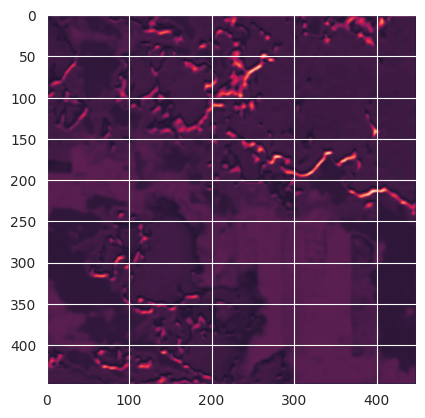

In [83]:
y_score_logits_s2 = pred_on_batch_and_plot(model=model_unet_s2,
                           test_s2_image=test_s2_image,
                           test_s1_image=None,
                           test_labels=test_labels,
                           img_index=2)
y_score_logits_s2

The highest scores are matching areas of cloud. The Sensinel 2 only model appears to focus on cloud detection instead of deforestation detection.

torch.Size([4, 1, 448, 448])


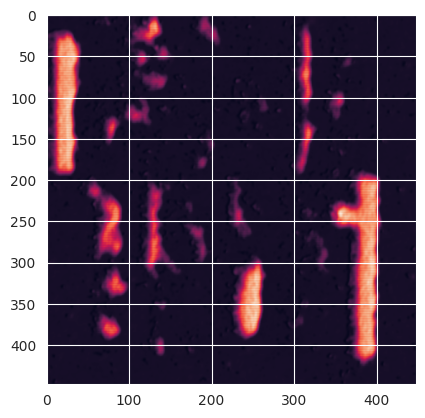

In [84]:
y_score_logits_s1 = pred_on_batch_and_plot(model=model_unet_s1,
                           test_s2_image=None,
                           test_s1_image=test_s1_image,
                           test_labels=test_labels,
                           img_index=2)

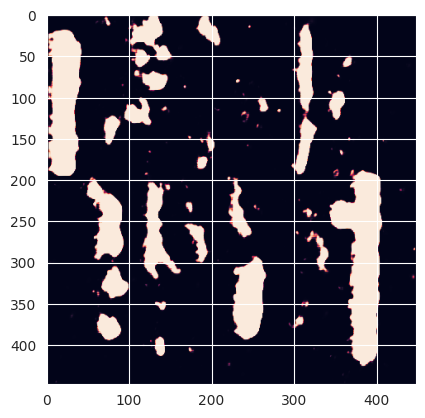

In [85]:
img_index=2
y_score_logits_s1[img_index].cpu().detach().numpy().squeeze()
y_scores_s1 = torch.sigmoid(y_score_logits_s1)
plt.imshow(y_scores_s1[img_index].cpu().detach().numpy().squeeze())

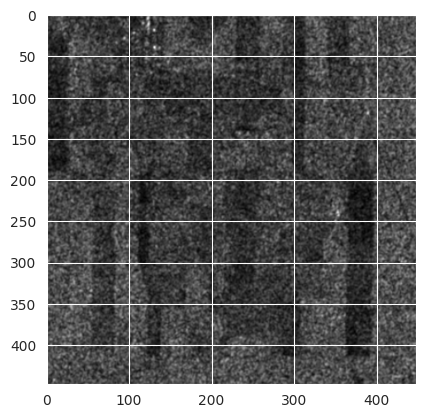

In [87]:
img_index=2
s1_img = test_s1_image[img_index,0,:,:]
plt.imshow(s1_img,cmap='gray')

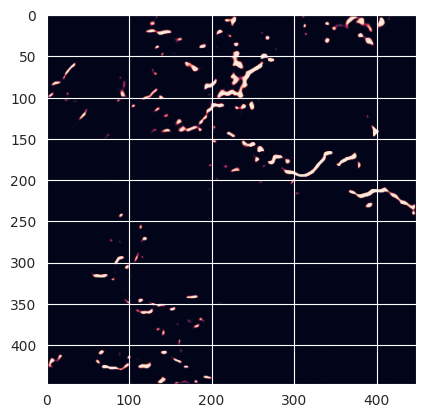

In [88]:
y_score_logits_s2[img_index].cpu().detach().numpy().squeeze()
y_scores_s2 = torch.sigmoid(y_score_logits_s2)
plt.imshow(y_scores_s2[img_index].cpu().detach().numpy().squeeze())

##7.2 Generating accuracy metrics

1.5217616e-06
0.02243269
1.0


/tmp/ipython-input-2859669917.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred.ravel())


<Axes: ylabel='Density'>

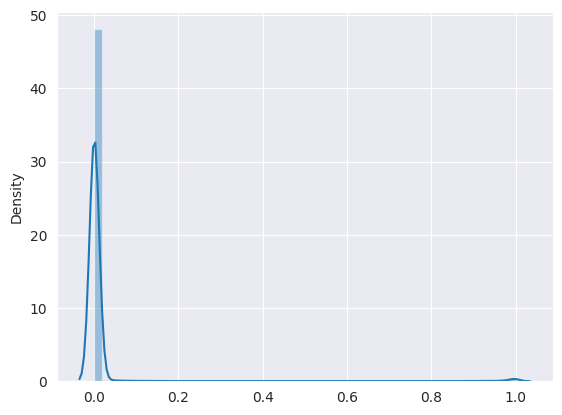

In [89]:
Y_pred = (y_scores_s2[img_index].cpu().detach().numpy().squeeze())
print(np.min(Y_pred))
print(np.mean(Y_pred))
print(np.max(Y_pred))
sns.distplot(Y_pred.ravel())
#Y_pred = (y_scores[img_index].cpu().detach().numpy().squeeze())
#sns.distplot(Y_pred.ravel())

In [90]:
Y_test = test_labels[img_index,:,:,:].detach().numpy().squeeze()
np.unique(Y_test)

array([0, 1])

In [91]:
#plot one image for comparion:X,y-pred,y-test
#show error in one image and pixel matrix of confusion with precision and recall
#could also do IOU at building level
#do ROC for one image

Y_pred_cat = Y_pred > 0.5
Y_test
Y_pred_cat= Y_pred_cat.astype('int')
Y_test_cat = Y_test.astype('int')

In [101]:
y_test=Y_test.ravel()
y_scores_test=Y_pred.ravel()

threshold = 0.5


Y_pred_cat = y_scores_test > threshold
Y_pred_cat= Y_pred_cat.astype('int')
Y_test_cat = y_test.astype('int')

report_dict=classification_report(Y_test_cat,
                                  Y_pred_cat,
                                  output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
confusion_matrix_val = confusion_matrix(Y_test_cat,Y_pred_cat)
confusion_matrix_val
#https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba

array([[195952,   4166],
       [   586,      0]])

In [102]:
report_df

,precision,recall,f1-score,support
0,0.997018,0.979182,0.988020,200118.000000
1,0.000000,0.000000,0.000000,586.000000
accuracy,0.976323,0.976323,0.976323,0.976323
macro avg,0.498509,0.489591,0.494010,200704.000000
weighted avg,0.994107,0.976323,0.985135,200704.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:996: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


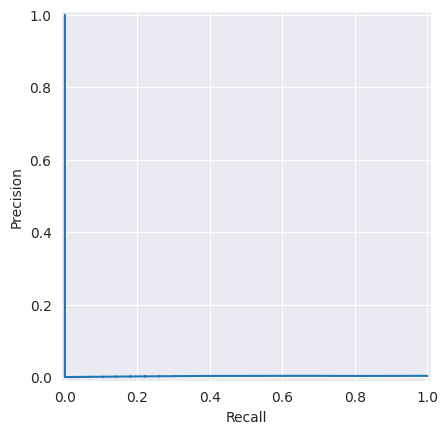

In [100]:
# Use sklearn to plot precision-recall curves
y_test=Y_test.ravel()
y_scores_test=Y_pred.ravel()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(y_true=y_test,
                       probas_pred=y_scores_test)

prd = PrecisionRecallDisplay(precision, recall)
prd.plot()

This is not a very useful plot for precision recall

In [96]:
thresholds = np.insert(thresholds,0,0)
precision_recall_df = pd.DataFrame.from_dict({'thresholds':thresholds,
                        'precision':precision,
                        'recall':recall,
                        })

(precision_recall_df)

,thresholds,precision,recall
0,0.000000,0.00292,1.0
1,0.000002,0.00292,1.0
2,0.000002,0.00292,1.0
3,0.000003,0.00292,1.0
4,0.000003,0.00292,1.0
...,...,...,...
197061,1.000000,0.00000,0.0
197062,1.000000,0.00000,0.0
197063,1.000000,0.00000,0.0
197064,1.000000,0.00000,0.0


In [99]:
# add IOU and precision-recall curve
target = Y_test_cat
prediction = Y_pred_cat
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)
iou_score

np.float64(0.0)

#8.Conclusions

In this data challenge, I was asked to develop deforestation multimodal model that exploits various satellite inputs.

In the first stage of this exercise, we examined the datasets decided to aim for the easiest solution: compare the performance of models using images matched in time. For each Sentinel 1 imagery we matched the closest available Sentinel 2 image in time. The idea was to make models comparable i.e. predicting with and without Sentinel 1 within a similar time period.

In this context, I created 3 UNET based models using pytorch deep learning library:

- model_unet_s2: takes Sentinel 2 imagery only as input.
- model_unet_s1: takes Sentinel 1 imagery only as input.
- model_unet_s1s2: takes Sentinel 1 and Sentinel 2 imagery only as input.

We trained models using GPU in colab with pyTorch (about 5 minutes for 20 epochs) and generated training loss plots and prediction maps.

The tranining loss plots show some decrease in loss for training but not but not always for validation. This suggest that we need to revisit training to improve results in the future.

Visualization of output predictions confirmed the poor performance of the currently trained model. I did perform some accuracy assessment with metrics but the metrics are overall very poor performance. I did not perform the comparison between models due to the very poor perforamnce.

**Interesting Insights and future improvements**

I did find that:

- for the Sentinel 2 model: the highest scores are matching areas of cloud so it suggests that he model is detecting clouds rather than deforestation. We could add a cloud value to the mask to take clouds into account.

- for the Sensinel 1 only model, there are no cloud issues (that is expected since SAR can go through clouds). Overall, the model appears to focus more on forest non forest but it does not show clearly deforested areas.

- the multimodal model does not appear to make good predictions too but I did not leverage the time dimension fully or created a complex architecture to leverage both inputs (Sentinel1 and Sentinel2).

- We had few data for training. I made a choice of matching by time but this means some mask images are used multiple times (not the input features though). It would be better to train input by alert ID (but could consider the time as additional channel).

- We could consider other models (LSTM added to CNN) or 3D cnn to integrate the time dimension.


# End of script